# Аналитический отчет для  продюсеров образовательных программ Skillbox

**Содержание работы:** <br>
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
[2. Расчёт потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчёт конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` — название курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` — сфера, к которой относится курс. <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` — город студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` — день рождения студента. <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` — название модуля, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` — название урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` — токен урока, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` — наличие видео *(true/false)*, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` — наличие домашней работы *(true/false)*. <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` — идентификатор курса, <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` — статус прохождения урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` — дата начала, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` — дата окончания. <br>
<br><br>

## 1. Описание и начальная работа с данными

In [4]:
# Импорт библиотек 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt   
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import re
from datetime import date

In [5]:
# Загрузка данных из файлов *.csv в датасеты
data_courses = pd.read_csv('courses.csv' ,sep=',')
data_courses = data_courses.drop('Unnamed: 0', axis=1)
data_courses.head()

id                           title  \
0  943306102e5b067d08a29094f37b8193         Java-разработчик c нуля   
1  17013cd19d25cb3f28dc1b2683721bb9              Веб-дизайн Базовый   
2  ac634845fb0350d0e9d49078aaa4b68f                   Excel Базовый   
3  0770b1b039964228294f1f34b29fc2c1   Руководитель digital-проектов   
4  abce125a877c2196a3bc7bfbc11b5fc5  Веб-вёрстка для начинающих 2.0   

         field  
0  Development  
1       Design  
2     Business  
3     Business  
4  Development

In [6]:
data_students = pd.read_csv('students.csv' ,sep=',')
data_students = data_students.drop('id_', axis=1)
data_students.head()

id              city    birthday
0  35e8a1938b9a33d5e45c8f4451c4309a               NaN         NaN
1  6c3e52be632fc50de9640147e4017dcd            Москва  1979-10-23
2  2033122d7c9b24b36eebc468d5259642               NaN         NaN
3  a6ae278c0eab719b3784e5ea147c128f            Москва         NaN
4  51b25c9afd20d178ef3c07276df38e2d  Великий Новгород         NaN

In [7]:
data_course_c = pd.read_csv('course_contents.csv' ,sep=',')
data_course_c.head()

course_id  module_number  \
0  04ba6d0b40670c43a209141fa01fa784              1   
1  04ba6d0b40670c43a209141fa01fa784              1   
2  04ba6d0b40670c43a209141fa01fa784              1   
3  04ba6d0b40670c43a209141fa01fa784              2   
4  04ba6d0b40670c43a209141fa01fa784              2   

                                        module_title  lesson_number  \
0  Введение в Motion Design. Тренды, разновидност...              1   
1  Введение в Motion Design. Тренды, разновидност...              2   
2  Введение в Motion Design. Тренды, разновидност...              3   
3        12 принципов анимации от Walt Disney Studio              1   
4        12 принципов анимации от Walt Disney Studio              2   

                                        lesson_title  \
0                                         Знакомство   
1  Введение в Motion Design. Тренды, разновидност...   
2                                    Домашняя работа   
3                                              Интро   
4                              12 принципов анимации   

                           lesson_token  is_video  is_homework  
0  aa344de3-1191-4e69-b485-61823118f71c      True        False  
1  246c8429-dd18-4f3a-a9fb-d3c07e7d6912      True        False  
2  c4377574-d117-45c7-8da5-dd7d1923517d     False         True  
3  7ea16a2d-e6d1-4158-907f-ae0ce8379c45      True        False  
4  7eea2930-11db-45c9-a16c-0d800b6dc99d      True        False

In [8]:
data_progresses = pd.read_csv('progresses.csv' ,sep=',')
data_progresses.head()

id                        student_id  \
0  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
1  a9d173142534e33ce39146017f9c6835  e24062de06d301937b3b3a8e383e3e21   
2  da26551a71cd62bbab844e3e54af7f71  35a36d90b745992b59085c8d54a072e7   
3  cda22f5fb5b5dcfad42b59b91b1938dc  37e8e8179295ae764524223086b0b568   
4  5ead083521d7f2284a43290c743aa93b  37e8e8179295ae764524223086b0b568   

                          course_id  
0  0770b1b039964228294f1f34b29fc2c1  
1  bf27a4bf4ada4c756451703ea62a914f  
2  6e4837f0a65c68efbfdd0594d6774701  
3  abce125a877c2196a3bc7bfbc11b5fc5  
4  17013cd19d25cb3f28dc1b2683721bb9

In [9]:
data_progress_p = pd.read_csv('progress_phases.csv' ,sep=',')
data_progress_p.head()

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2  a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3  a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4  a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   

                      start_date                    finish_date  
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00  
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00  
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00  
3   2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00  
4  2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00

In [11]:
# Создание общего датасета на основе датасета Progresses,
# добавление в общий датасет информации о курсах
df = data_progresses.merge(data_courses, left_on='course_id', right_on='id')
df.rename(columns={'id_x': 'progress_id', 'title': 'courses_title', 'field': 'courses_field'}, inplace=True)
df.drop(['id_y'], axis=1, inplace=True)
df.head()

progress_id                        student_id  \
0  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
1  cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   
2  301ff6dab40cf9608b861ae8f45b1480  b7fc6e2bb5f5a8ad10a0c35e834f38b2   
3  287a0ef515f4011877f559b8b25e0023  12f268f55937f8944e581af9cd410817   
4  3bbf34024ef5e73a38e720f009fa1480  d6252c6255d5b535635402eecc48eb2a   

                          course_id                  courses_title  \
0  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
1  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
2  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
3  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
4  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   

  courses_field  
0      Business  
1      Business  
2      Business  
3      Business  
4      Business

In [12]:
# Добавление нформации о курсах
df = df.merge(data_course_c )

# Добавление информации о прогрессе прохождения курсов
df = df.merge(data_progress_p,
              left_on=['progress_id', 'module_number', 'lesson_number'], 
              right_on=['progress_id', 'module_number', 'lesson_number'])
df.head()

progress_id                        student_id  \
0  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
1  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
2  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
3  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
4  cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   

                          course_id                  courses_title  \
0  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
1  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
2  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
3  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
4  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   

  courses_field  module_number                module_title  lesson_number  \
0      Business              1  Экологичный путь менеджера              1   
1      Business              4   Аналитика. Базовые навыки              1   
2      Business              4   Аналитика. Базовые навыки              2   
3      Business              4   Аналитика. Базовые навыки              3   
4      Business              1  Экологичный путь менеджера              1   

                   lesson_title                          lesson_token  \
0   Карта компетенций менеджера  023d96d8-63ac-4d6f-974f-a15add3cdb34   
1  Аналитика в digital-проектах  96c8b66c-6bce-4d02-908f-7577dc2b32b3   
2      Пишем ТЗ. Годные шаблоны  c75f28a2-02fe-47ce-929d-6db242111831   
3               Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9   
4   Карта компетенций менеджера  023d96d8-63ac-4d6f-974f-a15add3cdb34   

   is_video  is_homework status                     start_date  \
0      True        False   done         2018-02-06 21:47:41+00   
1      True        False   done  2018-02-19 19:21:24.985811+00   
2      True        False   done  2018-02-19 19:21:25.002537+00   
3     False         True   done  2018-02-19 19:21:25.013391+00   
4      True        False   done         2018-02-10 12:38:36+00   

                     finish_date  
0         2018-02-06 14:32:40+00  
1  2018-02-20 08:46:02.007429+00  
2  2018-02-20 08:46:02.022666+00  
3  2018-02-20 08:46:02.029132+00  
4         2018-02-10 09:58:23+00

`df` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progresses_id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `courses_title` — название курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `courses_field` — сфера, к которой относится курс, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` — название модуля, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` — название урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` — токен урока, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` — наличие видео *(true/false)*, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` — наличие домашней работы *(true/false)*. <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` — статус прохождения урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` — дата начала, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` — дата окончания. <br>
<br><br>


In [14]:
# Приведем даты к нужному формту в столбцах 'start_date' и 'finish_date'

#df.drop(['finish_date_y'], axis=1, inplace=True)
#df.drop(['start_date_y'], axis=1, inplace=True)
#df.drop(['finish_date_x'], axis=1, inplace=True)
#df.drop(['status_y'], axis=1, inplace=True)
#df.drop(['start_date_x'], axis=1, inplace=True)
#df.drop(['status_x'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   student_id     350677 non-null  object
 2   course_id      350677 non-null  object
 3   courses_title  350677 non-null  object
 4   courses_field  350677 non-null  object
 5   module_number  350677 non-null  int64 
 6   module_title   350677 non-null  object
 7   lesson_number  350677 non-null  int64 
 8   lesson_title   350677 non-null  object
 9   lesson_token   350677 non-null  object
 10  is_video       350677 non-null  bool  
 11  is_homework    350677 non-null  bool  
 12  status         350677 non-null  object
 13  start_date     350677 non-null  object
 14  finish_date    334508 non-null  object
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


**Посчитать общее количество курсов в датасете**

In [15]:
len(df['course_id'].unique())

15

**Количество модулей на каждом курсе**

In [16]:
df.groupby('courses_title')['module_title'].apply(lambda x: len(x.unique())).sort_values()

courses_title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_title, dtype: int64

**Количество уроков `lesson_title` в каждом модуле `module_title` на каждом курсе `courses_title`**

In [18]:
df.groupby(['courses_title', 'module_title']
          )['lesson_title'].aggregate(lambda x: len(x.unique())
                                     ).reset_index().sort_values(['courses_title', 'lesson_title'], ascending=(True, False)
                                                                ).head(10)

courses_title                                       module_title  \
1      Excel Базовый                          Основной функционал Excel   
2      Excel Базовый            Основной функционал Excel (продолжение)   
6      Excel Базовый  Формулы и функции Excel. Продолжаем работать с...   
0      Excel Базовый                          Визуализация данных Excel   
3      Excel Базовый                              Сводные таблицы Excel   
4      Excel Базовый     Формулы и функции Excel. Более сложные формулы   
7      Excel Базовый  Формулы и функции Excel. Работа с ошибками, пр...   
5      Excel Базовый                  Формулы и функции Excel. Введение   
8      Excel Базовый                            Экзаменационная работа    
17  Java-разработчик                                   Объекты и классы   

    lesson_title  
1             11  
2              7  
6              7  
0              5  
3              5  
4              5  
7              5  
5              3  
8              1  
17             9

**Медианное количество уроков `lesson_title` в модуле `module_title` на каждом курсе `courses_title`**

In [19]:
df.groupby(['courses_title', 'module_title'])['lesson_title'].aggregate(lambda x: len(x.unique())
                                                                       ).groupby(['courses_title']).aggregate(np.median)

courses_title
Excel Базовый                           5.0
Java-разработчик                        7.0
Java-разработчик c нуля                10.0
JavaScript с нуля                       7.0
PHP-разработчик с 0 до PRO. Часть 1     4.0
SMM-маркетолог от А до Я                6.0
UX-дизайн                               3.5
Анимация интерфейсов                    3.0
Веб-вёрстка для начинающих 2.0          7.0
Веб-дизайн PRO 2.0                      5.0
Веб-дизайн Базовый                      3.0
Веб-дизайн с нуля 2.0                   4.0
Веб-разработчик                         2.0
Интернет-маркетолог от Ingate           6.5
Руководитель digital-проектов           5.0
Name: lesson_title, dtype: float64

**Количество учеников `student_id` на каждом курсе `courses_title`**

In [20]:
df.groupby(['courses_title'])['student_id'].apply(lambda x: len(x.unique())).sort_values()

courses_title
SMM-маркетолог от А до Я                506
Веб-дизайн Базовый                      518
Java-разработчик c нуля                 581
Анимация интерфейсов                    598
Веб-разработчик                         628
Руководитель digital-проектов           685
Java-разработчик                        763
Excel Базовый                           782
PHP-разработчик с 0 до PRO. Часть 1     854
JavaScript с нуля                       966
UX-дизайн                              1151
Веб-дизайн PRO 2.0                     1711
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн с нуля 2.0                  2014
Интернет-маркетолог от Ingate          2168
Name: student_id, dtype: int64

**Минимальный, максимальный, средний, медианный возраст студентов**

In [21]:
#Уберем из датасета строки , где отсутствует дата рождения 
data_students= data_students[data_students['birthday'].notnull()]
df['start_date'] = df['start_date'].astype('datetime64[ms]')
df['finish_date'] = df['finish_date'].astype('datetime64[ms]')
df= df[df['finish_date'] > df['start_date']]
# Чтоб определить возраст студента нужно из последней даты, когда поступила информация, вычесть дату рождения студента 

#Определение текущей даты по дате последнего урока
date_today = df['finish_date'].max()

# Добавление в датасет колонки с возрастом
data_students['age'] = data_students['birthday'].apply(
    lambda x: date_today.year - date.fromisoformat(x).year)

# Очистим от некорректных значений возраста
data_students = data_students.query('age >= 18 and age <= 50')

# Вывод статистики по возрасту студентов
data_students['age'].describe()

count    24024.000000
mean        28.945804
std          6.632739
min         18.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         50.000000
Name: age, dtype: float64

**Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.**

In [22]:
df.merge(data_students, left_on='student_id', right_on='id'
        ).groupby('courses_title')['age'].aggregate([np.min, np.max, np.mean, np.median])

amin  amax       mean  median
courses_title                                                     
Excel Базовый                          18    50  32.476364    32.0
Java-разработчик                       18    50  29.322751    28.0
Java-разработчик c нуля                18    50  29.956935    29.0
JavaScript с нуля                      18    50  27.855120    27.0
PHP-разработчик с 0 до PRO. Часть 1    18    50  30.048570    29.0
SMM-маркетолог от А до Я               18    50  28.321693    28.0
UX-дизайн                              18    50  29.715254    29.0
Анимация интерфейсов                   19    50  29.470988    29.0
Веб-вёрстка для начинающих 2.0         18    50  28.035879    27.0
Веб-дизайн PRO 2.0                     18    50  28.075115    27.0
Веб-дизайн Базовый                     18    50  28.241578    27.0
Веб-дизайн с нуля 2.0                  18    50  27.587940    27.0
Веб-разработчик                        18    50  27.300680    26.0
Интернет-маркетолог от Ingate          18    50  30.644811    30.0
Руководитель digital-проектов          18    49  31.398794    31.0

**Построим bar-chart, отражающий количество студентов на каждом курсе.**

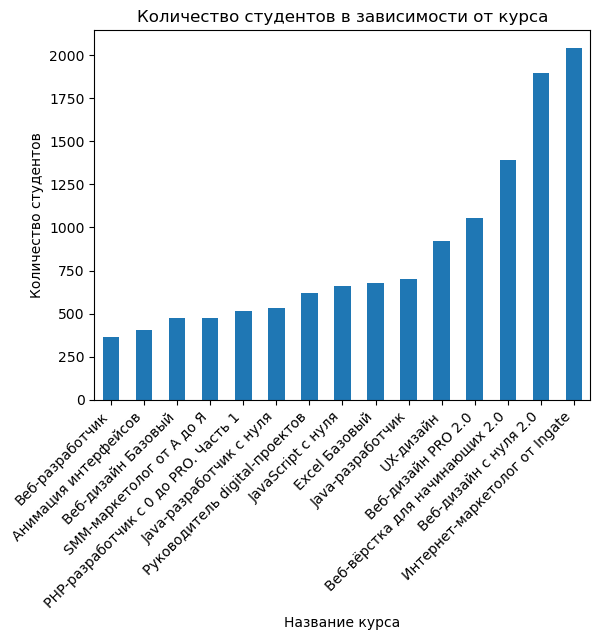

In [23]:
# Определение основных объектов диаграммы
fig, ax = plt.subplots()

# Построение диаграммы, отражающей количество студентов на каждом курсе
df.pivot_table(
    values='student_id', index='courses_title', aggfunc=lambda x: len(x.unique())
).sort_values(
    'student_id', ascending=True
).plot.bar(
    ax=ax, legend=False
)

# Вывод подписей делений оси абсцисс
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Количество студентов в зависимости от курса')

# Вывод названия осей
ax.set(xlabel='Название курса', ylabel='Количество студентов')

# Вывод диаграммы на страницу
plt.show()

Вывод:
- При подсечете количества модулей на каждом курсе, большее количество имеет курсы, связанные с дизайном. Это закономерность имеет обоснование, т.к. данное направление в представлении материала использует графические программы, которые намного сложнее в изучении, чем например exel.
- Анализ по количеству уроков каждого курса показывает, что основная нагрузка на преподавателей приходится в начале курса, далее снижается. В курсах exel в начале 11 уроков , в конце 5.
- Из медианного значения количества уроков для каждого модуля можно утверждать, что курс "Java-разработчик c нуля" является самым интенсивным курсом.
- По количеству учеников на каждом курсе можно сказать, что наибольший интерес представляют курсы - Интернет-маркетолог от Ingate , Веб-дизайн с нуля 2.0  и Веб-вёрстка для начинающих 2.0.
- Основные статистические показатели возраста студентов ,при текущих значениях выявили, что четверть студентов на курсах моложе 24 лет, половина студентов моложе 28 лет, 3/4 студентов моложе 33 лет. Таким образом Возраст целевой аудитории от24 до 33 лет.
- При рассмотрении медианного возраста студентов, анализ отражает возрастное распределение в линейке курсов. Среди более молодого возраста - Веб-разработчик, для тех кто старше 30 лет, рассматривают курсы - Excel и Руководитель digital-проектов.
- Распределение количества студентов на курсах представленное на диаграмме показывает, что большая часть аудитории студентов представляет сферу Design и Marketing, меньшая часть аудитории - Business.

## 2. Расчет потенциальной нагрузки на преподавателей

**Рассчитаем количество студентов в каждом месяце для каждого курса, которые начинали выполнение первой домашней работы в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 года до июля 2019 года включительно)**

In [24]:
# Создание нового датасета на основе общего
data = df[df['is_homework']==True].copy()
data['start_date'] = pd.to_datetime(data.start_date)
data['finish_date'] = pd.to_datetime(data.finish_date)

In [25]:
data['YearMonth']= data['start_date'].values.astype('datetime64[M]')
data['YearMonth'] = data['YearMonth'].dt.to_period('M')
data.head()

progress_id                        student_id  \
3   8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
7   cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   
10  cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   
14  cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   
23  287a0ef515f4011877f559b8b25e0023  12f268f55937f8944e581af9cd410817   

                           course_id                  courses_title  \
3   0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
7   0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
10  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
14  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
23  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   

   courses_field  module_number                                 module_title  \
3       Business              4                    Аналитика. Базовые навыки   
7       Business              1                   Экологичный путь менеджера   
10      Business              2  Релиз-менеджмент: готовим проекты к запуску   
14      Business              3           Требовательность digital-продюсера   
23      Business              1                   Экологичный путь менеджера   

    lesson_number     lesson_title                          lesson_token  \
3               3  Домашняя работа  e977dbbd-0b9f-461d-8599-b4abdc9e54f9   
7               4  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa   
10              3  Домашняя работа  de871f89-12eb-4718-9650-efbf5ca9cc05   
14              4  Домашняя работа  5b6a0bec-b7d7-4b32-9820-ed30ce2f31d4   
23              4  Домашняя работа  8e0b5603-ecc4-46f0-9468-02df445089aa   

    is_video  is_homework status              start_date  \
3      False         True   done 2018-02-19 19:21:25.013   
7      False         True   done 2018-02-19 12:34:31.347   
10     False         True   done 2018-02-20 14:19:59.423   
14     False         True   done 2018-03-01 20:25:55.431   
23     False         True   done 2018-03-15 12:34:45.174   

               finish_date YearMonth  
3  2018-02-20 08:46:02.029   2018-02  
7  2018-02-20 09:17:05.851   2018-02  
10 2018-03-12 08:33:21.364   2018-02  
14 2018-03-12 08:32:33.730   2018-03  
23 2018-03-21 09:15:06.128   2018-03

In [26]:
# первая дз на курсе
n_of_1st_hw = data.groupby(['courses_title']).agg({'module_number':['min']}).reset_index()
n_of_1st_hw.columns = n_of_1st_hw.columns.droplevel(0)
n_of_1st_hw.columns = ['courses_title', 'module_number']
n_of_1st_hw

courses_title  module_number
0                         Excel Базовый              1
1                      Java-разработчик              1
2               Java-разработчик c нуля              1
3                     JavaScript с нуля              1
4   PHP-разработчик с 0 до PRO. Часть 1              1
5              SMM-маркетолог от А до Я              1
6                             UX-дизайн              1
7                  Анимация интерфейсов              1
8        Веб-вёрстка для начинающих 2.0              1
9                    Веб-дизайн PRO 2.0              1
10                   Веб-дизайн Базовый              3
11                Веб-дизайн с нуля 2.0              1
12                      Веб-разработчик              1
13        Интернет-маркетолог от Ingate              1
14        Руководитель digital-проектов              1

In [27]:
# сортируем дф с помощью объединения с дф только с номерами первых дз на каждом курсе
data_sorted = data.merge(n_of_1st_hw, left_on=['courses_title','module_number'], right_on=['courses_title','module_number'])
data_sorted = data_sorted.groupby(['courses_title', 'YearMonth'])['YearMonth'].count().unstack(fill_value=0).stack().to_frame().reset_index()
data_sorted

courses_title YearMonth   0
0                    Excel Базовый   2016-03   0
1                    Excel Базовый   2016-11   0
2                    Excel Базовый   2017-03   0
3                    Excel Базовый   2017-04   0
4                    Excel Базовый   2017-05   0
..                             ...       ...  ..
385  Руководитель digital-проектов   2019-03  34
386  Руководитель digital-проектов   2019-04  16
387  Руководитель digital-проектов   2019-05  23
388  Руководитель digital-проектов   2019-06  11
389  Руководитель digital-проектов   2019-07  10

[390 rows x 3 columns]

In [29]:
data_sorted.columns = ['courses_title','year_and_month','students_count']
data_sorted.query('students_count > 0').head()

courses_title year_and_month  students_count
8   Excel Базовый        2018-02               4
9   Excel Базовый        2018-03               2
11  Excel Базовый        2018-05               3
12  Excel Базовый        2018-06               6
13  Excel Базовый        2018-07              13

In [30]:
data_sorted = data_sorted.sort_values(["courses_title", "year_and_month"])
data_sorted["students_growth"] = data_sorted.groupby("courses_title")["students_count"].cumsum()
data_sorted=data_sorted.query('students_growth > 0')
data_sorted.head()

courses_title year_and_month  students_count  students_growth
8   Excel Базовый        2018-02               4                4
9   Excel Базовый        2018-03               2                6
10  Excel Базовый        2018-04               0                6
11  Excel Базовый        2018-05               3                9
12  Excel Базовый        2018-06               6               15

**Построим line-graph с приростом студентов в каждом месяце для каждого курса**

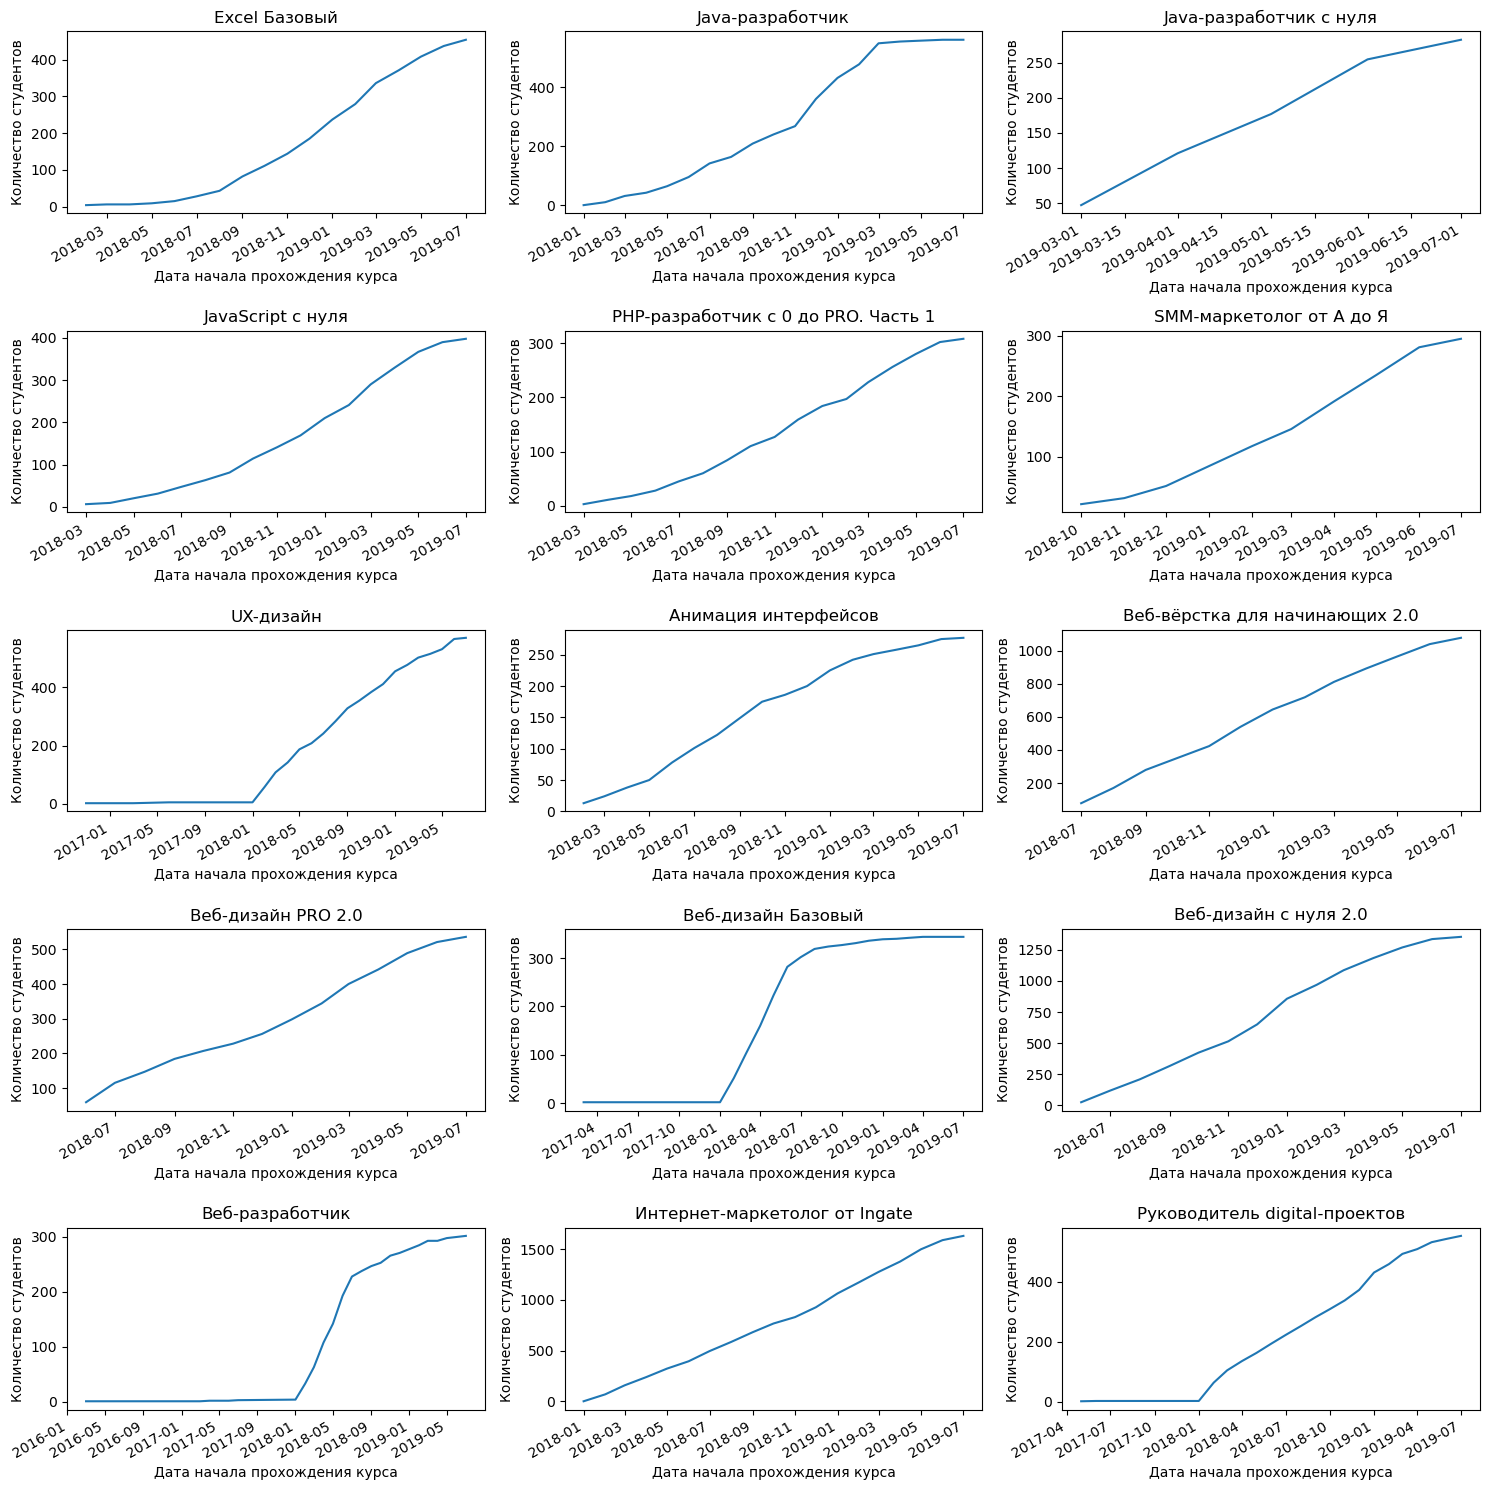

In [31]:
# Разметра сетки 
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Определение списка курсов
titles = data_sorted['courses_title'].unique()

# Вывод диаграмм 
for index, ax in enumerate(axes.flat):
# Вывод графика
    chart_df = data_sorted[data_sorted['courses_title']==titles[index]].pivot_table('students_growth', index='year_and_month')
    chart_df.plot(ax=ax, title=titles[index], legend=False, x_compat=True)
    
    ax.set_xlabel('Дата начала прохождения курса')
    ax.set_ylabel('Количество студентов')

# Автоматическое позиционирование элементов графика
fig.tight_layout()
plt.show()

**Построим line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса**

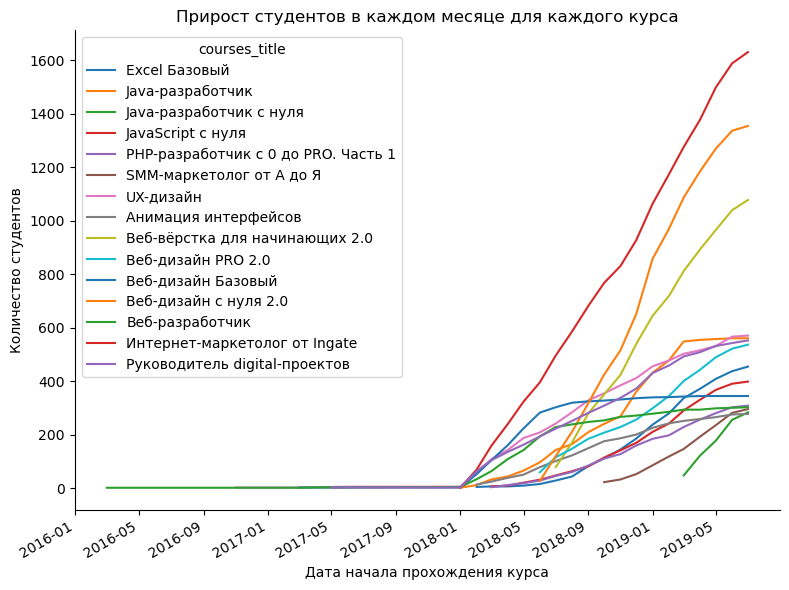

In [41]:
# Разметра сетки 
fig, ax = plt.subplots(figsize=(8, 6))

# Вывод графика на страницу
for line in titles:
    data_sorted[data_sorted['courses_title']==line].pivot_table(
        'students_growth', index='year_and_month', columns='courses_title').plot(ax=ax, x_compat=True)

ax.set_title('Прирост студентов в каждом месяце для каждого курса')
ax.set_xlabel('Дата начала прохождения курса')
ax.set_ylabel('Количество студентов')

# Скрытие рамки графика
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Автоматическое позиционирование элементов графика
fig.tight_layout()
plt.show()

**Рассчитаем количество прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.**

In [42]:
# Формирование датасета по прогрессу выполнения домашних работ на основе старого
data_hw = df[(df['finish_date'].notnull()) & (df['is_homework'] == True)].copy()
data_hw['homework_month'] = data_hw.apply(lambda x: pd.date_range(x.start_date.strftime("%Y-%m"), 
                                                                  x.finish_date.strftime("%Y-%m"), freq='MS'
                                                                 ).strftime("%Y-%m").tolist(), axis=1)
data_hw = data_hw.explode('homework_month')

In [43]:
# Форматирование столбца с датами начала работ в удобную форму
data_hw['start_date'] = data_hw.loc[:,'start_date'].map(lambda x: dt.strftime(dt.strptime(re.split('[.+]',str(x))[0], '%Y-%m-%d %H:%M:%S'),"%Y-%m"))

In [44]:
# Формирование датасета по прогрессу выполнения домашних работ, оставляем только те колонки, которые пригодятся для дальнейшего расчета 
data_hw = data_hw.loc[:,['courses_title','start_date','homework_month']]
data_hw.set_index(['courses_title','start_date'], inplace = True)
data_hw.reset_index(inplace = True)
data_hw.head()

courses_title start_date homework_month
0  Руководитель digital-проектов    2018-02        2018-02
1  Руководитель digital-проектов    2018-02        2018-02
2  Руководитель digital-проектов    2018-02        2018-02
3  Руководитель digital-проектов    2018-02        2018-03
4  Руководитель digital-проектов    2018-03        2018-03

In [45]:
# Создание столбца-счётчика в датасете
for i in data_hw.index:
    date_range = pd.date_range(data_hw.loc[i,'start_date'],
                               data_hw.loc[i,'homework_month'], freq='M')
    date_range = list(map(lambda x: dt.strftime(dt.strptime(str(x),'%Y-%m-%d %H:%M:%S'),'%Y-%m'), date_range))[1:]
    for date in date_range:
        data_hw.loc[len(data_hw)] = [data_hw.loc[i,'courses_title'],
                                            date,
                                            data_hw.loc[i,'homework_month']]

data_hw['homework_counter'] = 1
# Группировка датасета в котором счетчик подсчитывает сумму заданий законченных в текущем месяце по каждому курсу
data_hw = data_hw.groupby(['courses_title', 'homework_month']).sum()
data_hw

homework_counter
courses_title                 homework_month                  
Excel Базовый                 2018-02                       19
                              2018-03                        6
                              2018-04                       13
                              2018-05                       19
                              2018-06                       21
...                                                        ...
Руководитель digital-проектов 2019-03                      532
                              2019-04                      431
                              2019-05                      377
                              2019-06                      244
                              2019-07                      159

[258 rows x 1 columns]

In [46]:
data_hw = data_hw.sort_values(["courses_title", "homework_month"])
data_hw["homework_growth"] = data_hw.groupby("courses_title")["homework_counter"].cumsum()
data_hw=data_hw.reset_index()

**Построим line-graph для количества прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса**

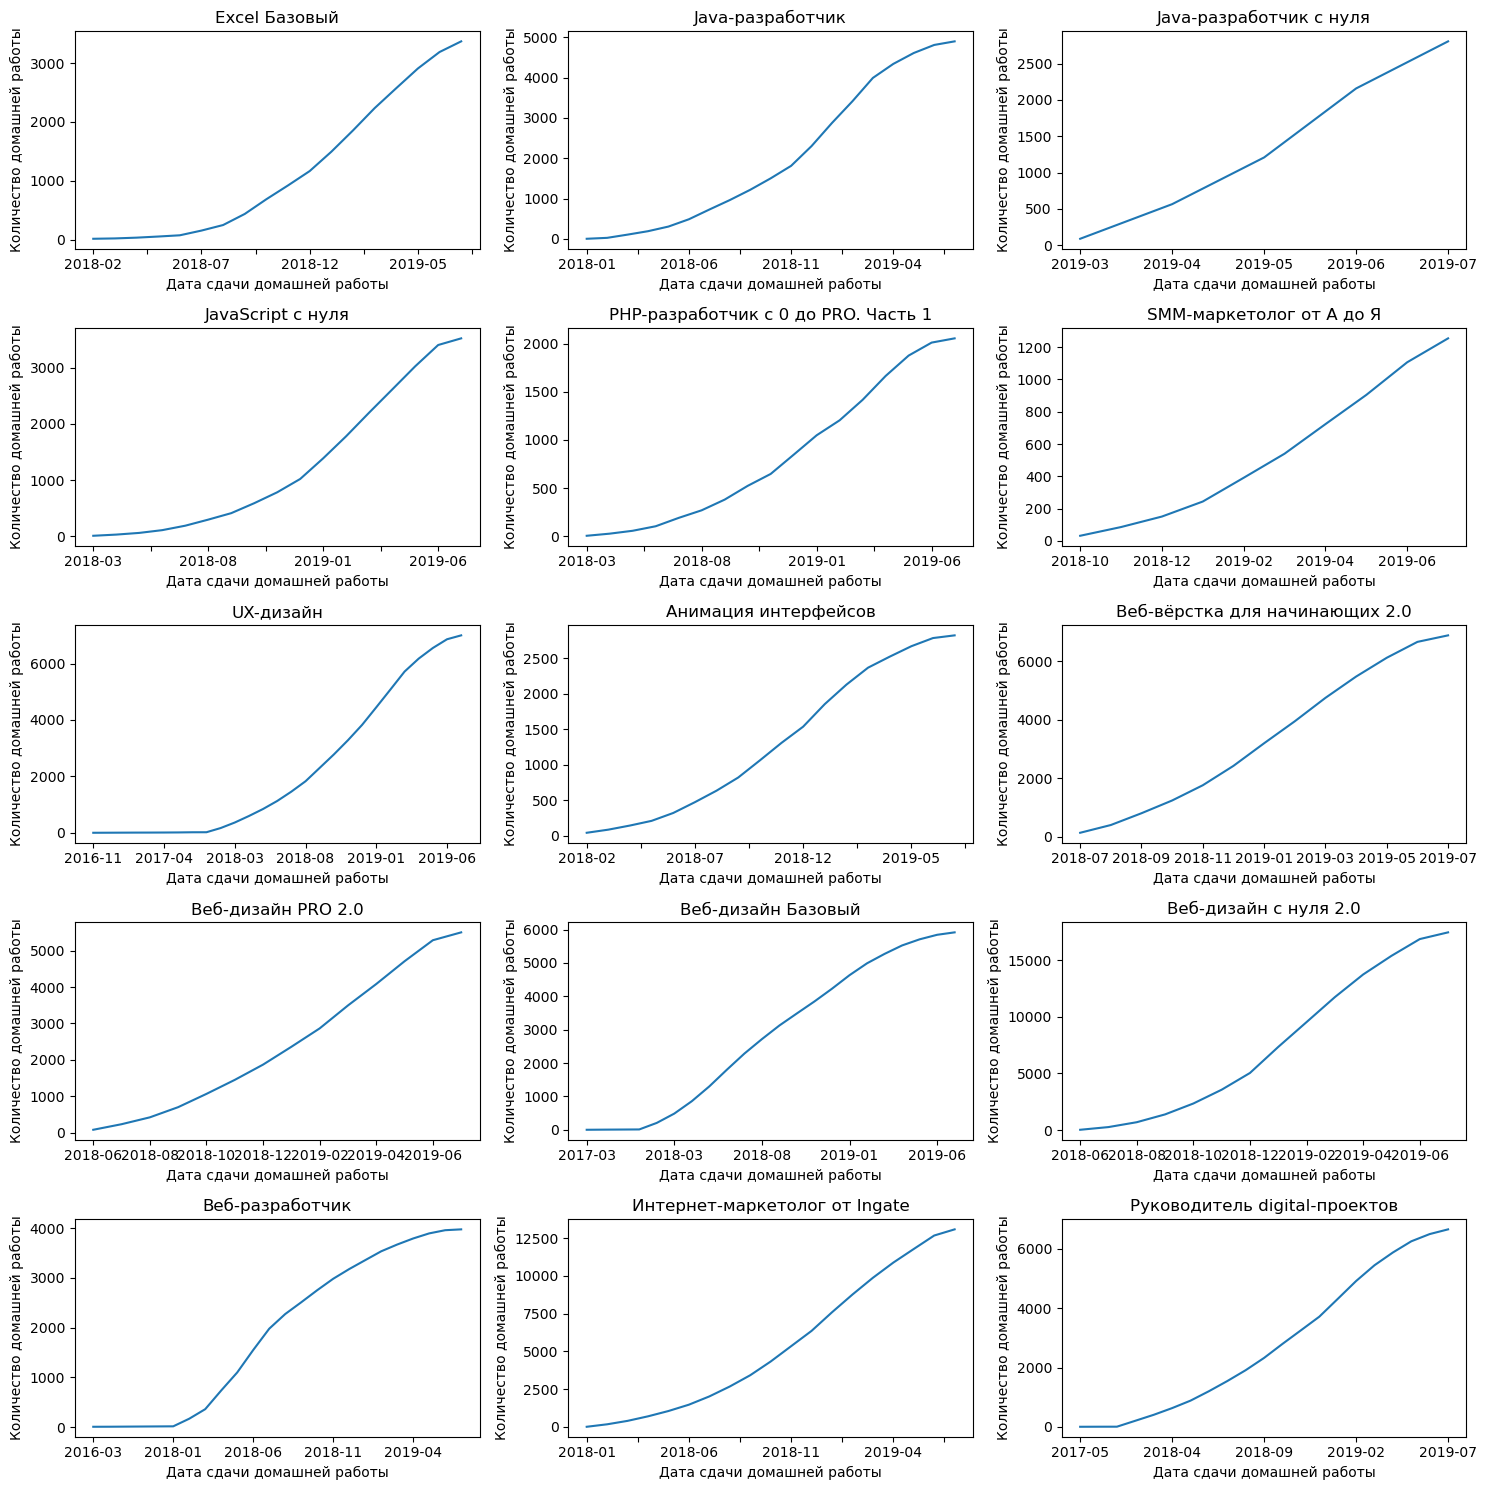

In [47]:
# Разметра сетки 
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Определение списка курсов
titles = data_hw['courses_title'].unique()

# Вывод диаграмм 
for index, ax in enumerate(axes.flat):
# Вывод графика
    chart_df = data_hw[data_hw['courses_title']==titles[index]].pivot_table('homework_growth', index='homework_month')
    chart_df.plot(ax=ax, title=titles[index], legend=False, x_compat=True)
    
    ax.set_xlabel('Дата сдачи домашней работы')
    ax.set_ylabel('Количество домашней работы')

# Автоматическое позиционирование элементов графика
fig.tight_layout()
plt.show()

**Построим один line-graph для всех курсов** 

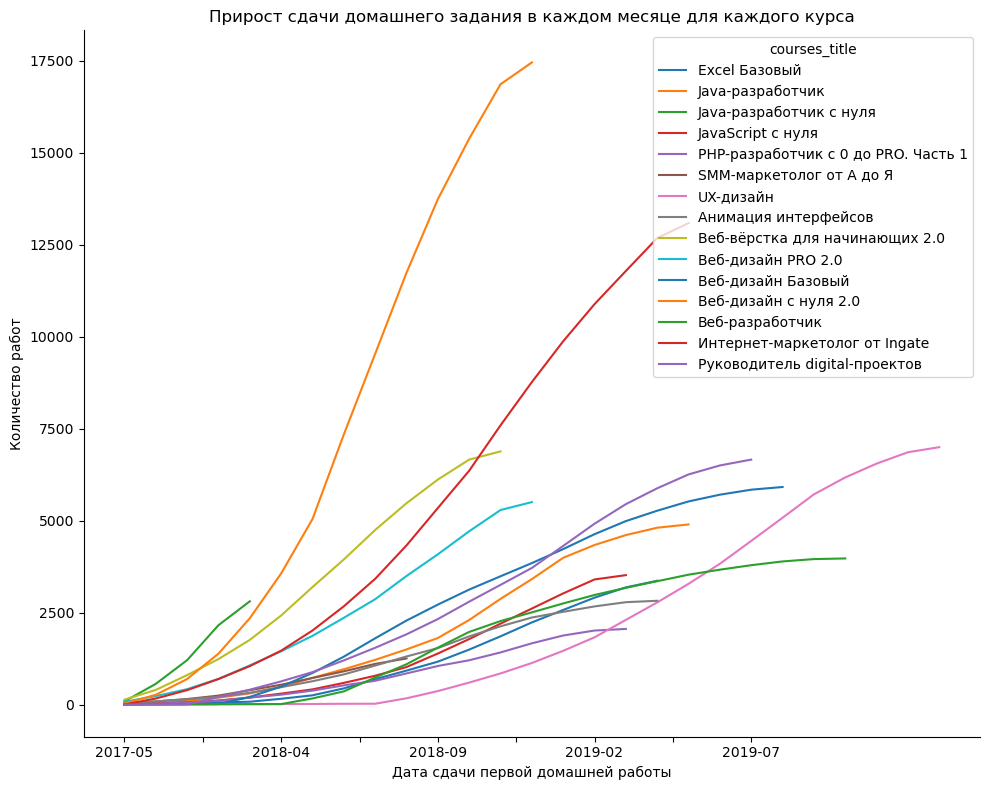

In [48]:
# Разметра сетки 
fig, ax = plt.subplots(figsize=(10, 8))

# Вывод графика на страницу
for line in titles:
    data_hw[data_hw['courses_title']==line].pivot_table(
        'homework_growth', index='homework_month', columns='courses_title').plot(ax=ax, x_compat=True)

ax.set_title('Прирост сдачи домашнего задания в каждом месяце для каждого курса')
ax.set_xlabel('Дата сдачи первой домашней работы')
ax.set_ylabel('Количество работ')

# Скрытие рамки графика
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Автоматическое позиционирование элементов графика
fig.tight_layout()
plt.show()

На основании проведенного иследования можно сформировать выводы:
- Среди студенов пользуются популярностью курсы "Java разработчик" и "Веб-верстка для начинающих 2.0"
- Наименьшей популярностью пользуются курсы "Веб-разработчик" и "Анимация интерфейсов"
- У курсов "Веб-разработчик" и "Веб-дизайн базовый" в начале имеет рост , но в дальнейшем рост замедляется.
- Кривые прироста студентов остальных курсов характеризуются последовательным ростом на протяжении всего периода
- Анализ кривых прогресса по выполнению домашнего задания на курсах показывает идентичность поведения с поведением кривых прироста студентов, особых отличий в поведении кривых нет
- Общая диаграмма прогресса выполнения домашнего задания показывает лидеров по количеству практических работ (домашних заданий) - "Веб-дизайн с нуля 2.0" и "Интернет-маркетолог от Ingate", "SMM-маркетолог от А до Я".


## 3. Выявление проблемных модулей

**Рассчитаем минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса.**

In [49]:
# Формирование датасета в разрезе модулей и курсов
data_modules = df[(df['finish_date'].notnull()) & (df['is_homework'] == True)].copy()
data_modules = data_modules.loc[:,['courses_title', 'module_title', 'start_date', 'finish_date']]

# Определение времени прохождения каждого модуля для каждого курса
data_modules['duration'] = (data_modules['finish_date'] - data_modules['start_date']).dt.days

# Очистка датасета от "аномальных" данных
data_modules = data_modules.query('finish_date >= start_date')
data_modules.head()

courses_title  \
3   Руководитель digital-проектов   
7   Руководитель digital-проектов   
10  Руководитель digital-проектов   
14  Руководитель digital-проектов   
23  Руководитель digital-проектов   

                                   module_title              start_date  \
3                     Аналитика. Базовые навыки 2018-02-19 19:21:25.013   
7                    Экологичный путь менеджера 2018-02-19 12:34:31.347   
10  Релиз-менеджмент: готовим проекты к запуску 2018-02-20 14:19:59.423   
14           Требовательность digital-продюсера 2018-03-01 20:25:55.431   
23                   Экологичный путь менеджера 2018-03-15 12:34:45.174   

               finish_date  duration  
3  2018-02-20 08:46:02.029         0  
7  2018-02-20 09:17:05.851         0  
10 2018-03-12 08:33:21.364        19  
14 2018-03-12 08:32:33.730        10  
23 2018-03-21 09:15:06.128         5

In [50]:
# Вывод статистики по прохождении каждого модуля и курса
data_modules1=data_modules.groupby(['courses_title', 'module_title']
                                  ).aggregate({'start_date': np.min, 'finish_date': np.max, 'duration': [np.min, np.max, np.mean, np.median]}
                                             ).reset_index().sort_values(['courses_title', ('start_date', 'amin')])

In [51]:
data_modules1

courses_title  \
                                     
1                    Excel Базовый   
2                    Excel Базовый   
5                    Excel Базовый   
6                    Excel Базовый   
4                    Excel Базовый   
..                             ...   
185  Руководитель digital-проектов   
177  Руководитель digital-проектов   
188  Руководитель digital-проектов   
180  Руководитель digital-проектов   
179  Руководитель digital-проектов   

                                          module_title  \
                                                         
1                            Основной функционал Excel   
2              Основной функционал Excel (продолжение)   
5                    Формулы и функции Excel. Введение   
6    Формулы и функции Excel. Продолжаем работать с...   
4       Формулы и функции Excel. Более сложные формулы   
..                                                 ...   
185                  Решение факапов. Lean/TOC. Обзор.   
177                            Интеграционные проекты.   
188  Управление дизайнерами. Разработка дизайна по ...   
180                     Основы технической грамотности   
179  Контроль. Риски. Поощрения. Наказания. Обратна...   

                 start_date             finish_date duration                  \
                       amin                    amax     amin amax       mean   
1   2018-02-19 12:32:48.645 2019-07-17 02:15:50.671        0  183   5.515419   
2   2018-02-19 12:33:00.394 2019-07-17 02:18:50.866        0  184   3.805970   
5   2018-02-19 12:33:13.046 2019-07-17 02:26:56.669        0   89   2.890339   
6   2018-02-19 12:33:34.459 2019-07-17 02:24:35.981        0  327  10.515050   
4   2018-02-19 12:33:48.839 2019-07-17 02:28:28.572        0  175   6.921053   
..                      ...                     ...      ...  ...        ...   
185 2018-02-19 12:21:39.606 2019-07-03 05:14:41.863        0  211  22.518519   
177 2018-02-19 12:22:45.940 2019-07-16 05:03:02.767        0  246  28.403226   
188 2018-02-19 12:27:12.915 2019-07-16 04:58:54.643        0  199  15.807018   
180 2018-02-19 12:29:14.125 2019-07-12 08:28:30.744        0  132   6.842105   
179 2018-02-19 12:31:18.437 2019-07-02 05:09:37.284        0  355  20.039216   

            
    median  
1      2.0  
2      1.0  
5      1.0  
6      3.0  
4      3.0  
..     ...  
185    7.0  
177   13.0  
188    8.0  
180    2.0  
179    7.0  

[190 rows x 8 columns]

**Построим line-graph с медианным временем прохождения каждого модуля для каждого курса.**

In [53]:
chart_df = data_modules.groupby(['courses_title', 'module_title']).aggregate(
    {'duration': np.median}
).reset_index()

chart_df.head()

courses_title                                    module_title  duration
0  Excel Базовый                       Визуализация данных Excel       4.0
1  Excel Базовый                       Основной функционал Excel       2.0
2  Excel Базовый         Основной функционал Excel (продолжение)       1.0
3  Excel Базовый                           Сводные таблицы Excel       2.0
4  Excel Базовый  Формулы и функции Excel. Более сложные формулы       3.0

C:\Users\User01\AppData\Local\Temp\ipykernel_5124\727306495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\User01\AppData\Local\Temp\ipykernel_5124\727306495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\User01\AppData\Local\Temp\ipykernel_5124\727306495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\User01\AppData\Local\Temp\ipykernel_5124\727306495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\User01\AppData\Local\Temp\ipykernel_5124\727306495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\User01\AppData\Local\Temp\ipykernel_5124\727306495.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\User01\

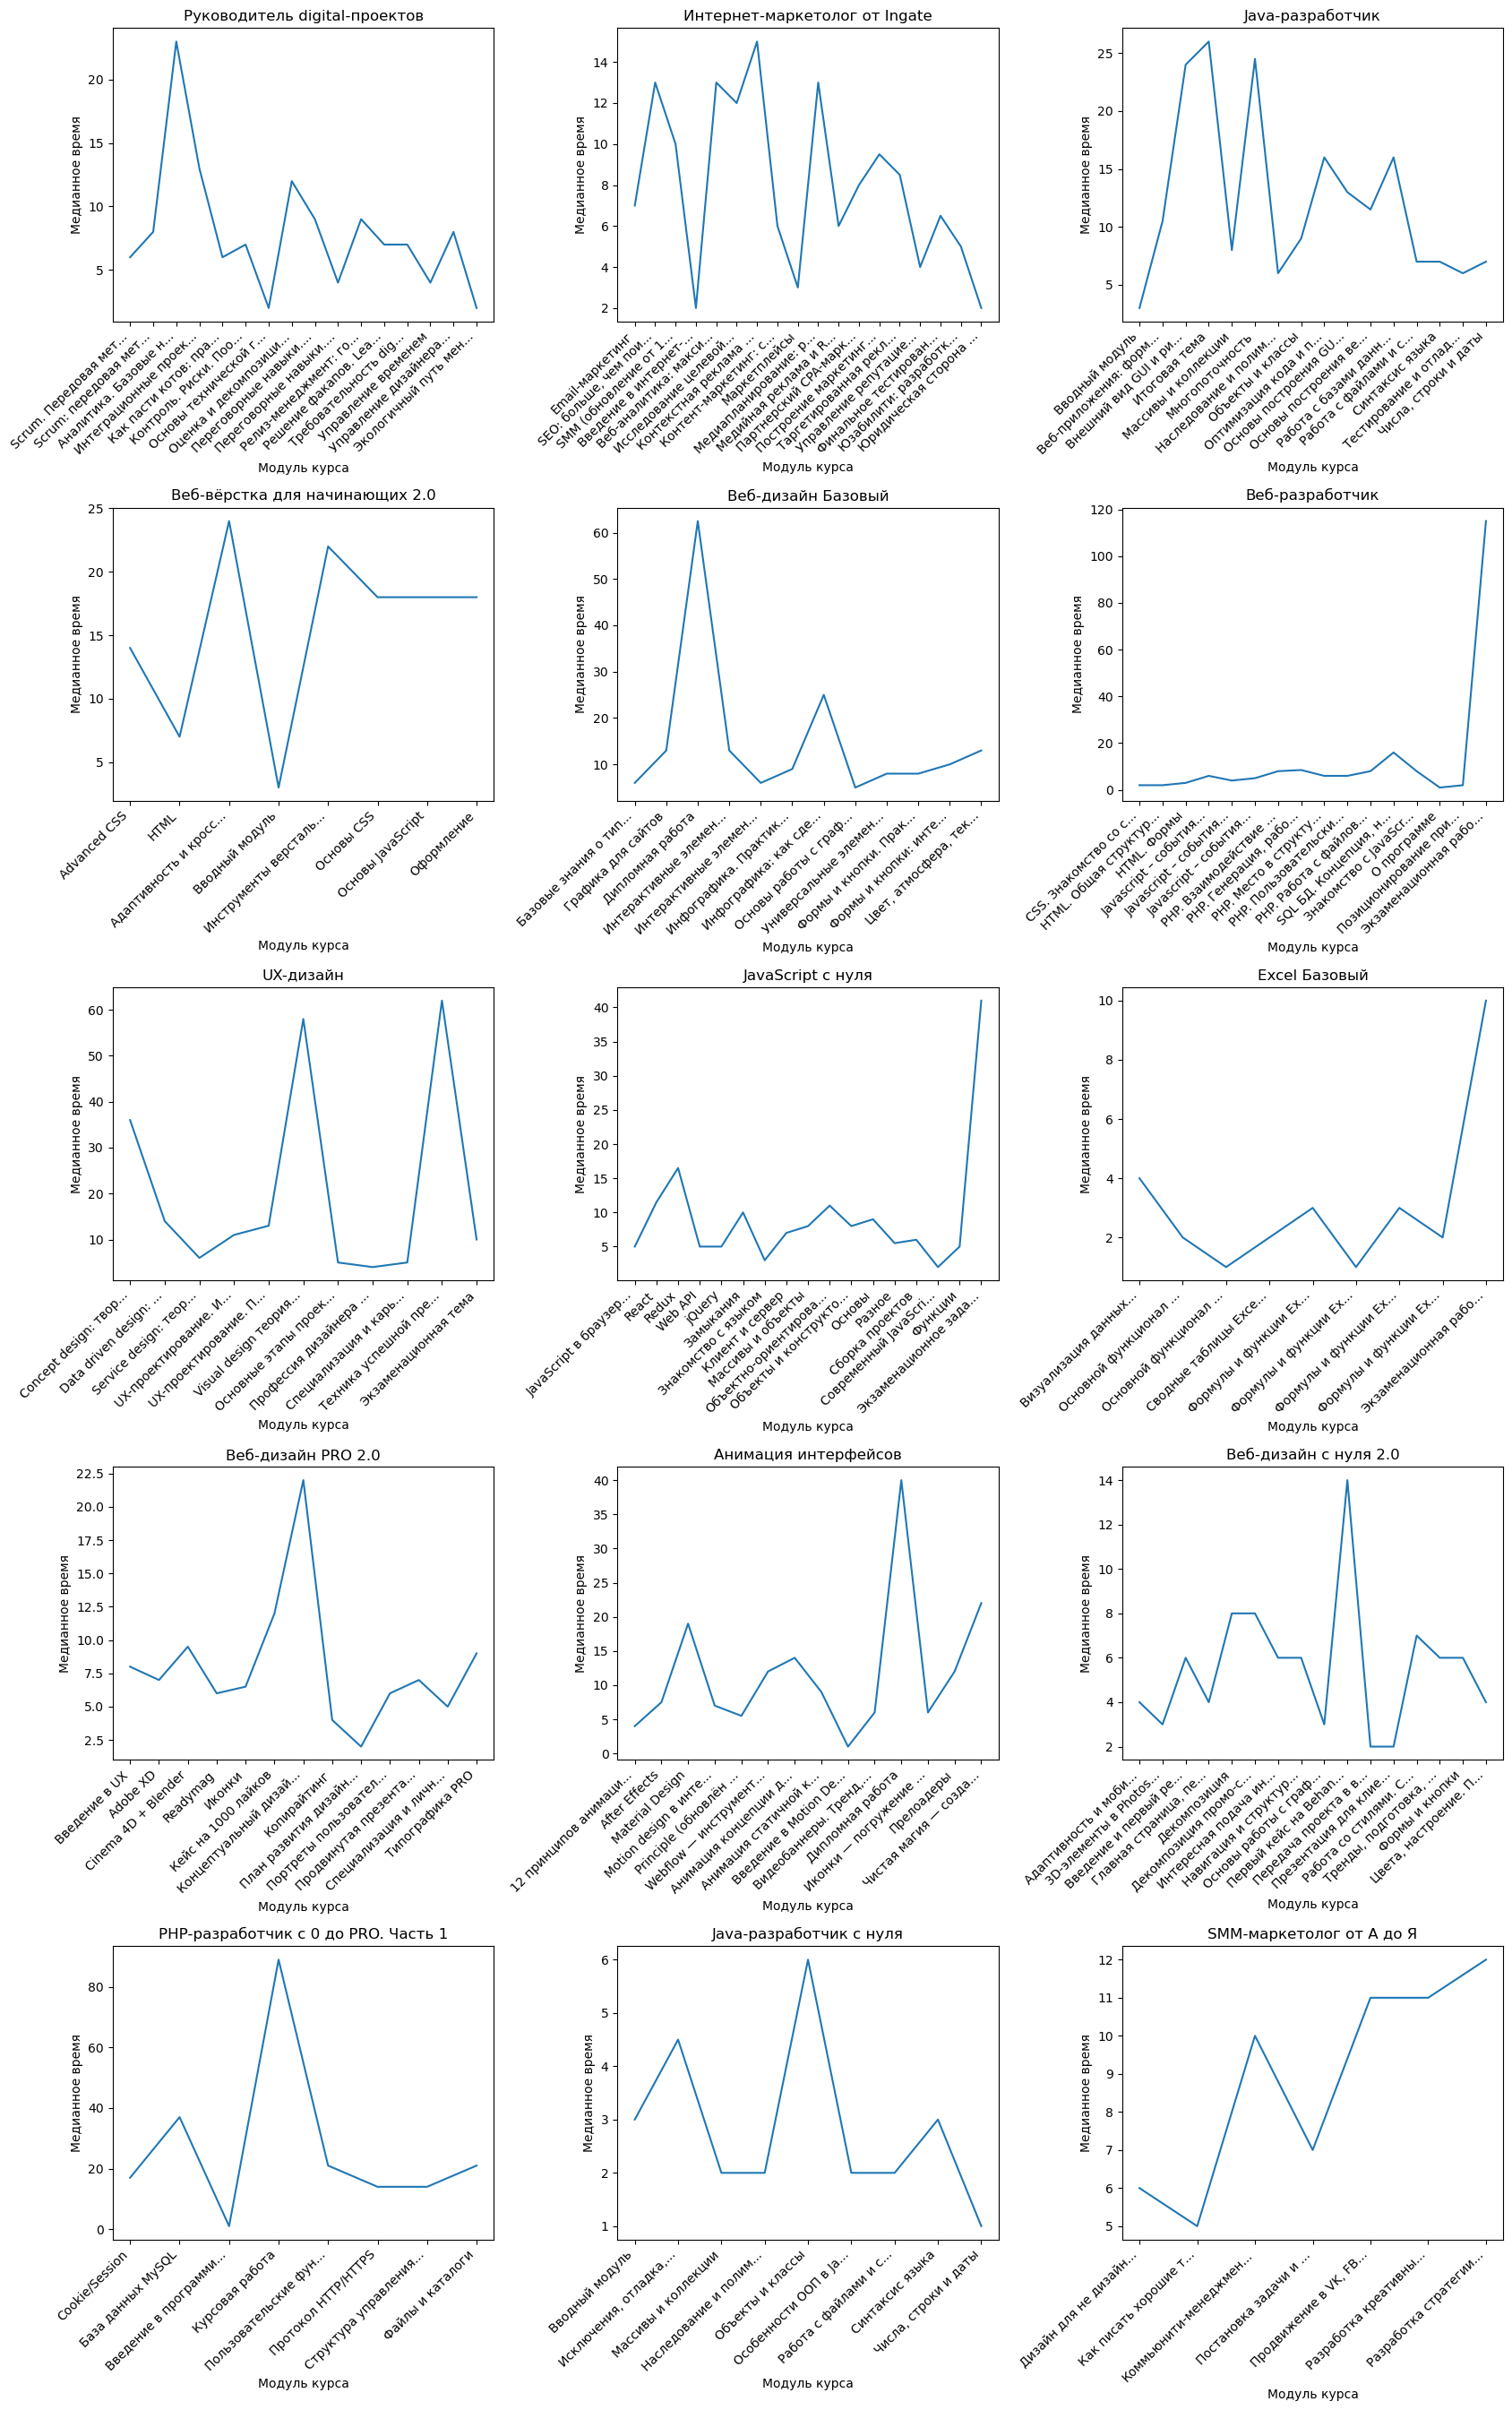

In [54]:
# Разметра сетки 
fig, axes = plt.subplots(5, 3, figsize=(17, 27))

# Определение списка курсов
titles = data_modules['courses_title'].unique()
for index, ax in enumerate(axes.flat):
    # Вывод графика медианного времени прохождения модуля для курса из списка
    ax.plot(chart_df[chart_df['courses_title']==titles[index]].index.astype(str), 
            chart_df.loc[chart_df['courses_title']==titles[index], 'duration'])
    # Вывод подписей делений оси абсцисс
    ax.set_xticklabels(
        chart_df.loc[chart_df['courses_title']==titles[index], 'module_title'].apply(
            lambda x: x[:20] + '...' if len(x) > 20 else x), 
        rotation=45, ha='right')
    ax.set_title(titles[index])
    ax.set_xlabel('Модуль курса')
    ax.set_ylabel('Медианное время')

fig.tight_layout()
plt.show()

**Выявим сезонность, посчитаем медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.** 

In [55]:
# Определение месяца завершения выполнения домашнего задания
data_modules['homework'] = data_modules['finish_date'].map(lambda x: dt.strftime(x,'%m'))

# Вывод медианного времени выполнения домашней работы в разрезе месяцев
data_median  = data_modules.groupby(['courses_title','homework']).agg(median_time = ('duration', 'median')).reset_index()
data_median.head()

courses_title homework  median_time
0  Excel Базовый       01          2.0
1  Excel Базовый       02          2.0
2  Excel Базовый       03          2.0
3  Excel Базовый       04          1.0
4  Excel Базовый       05          2.0

**Построим line-graph**

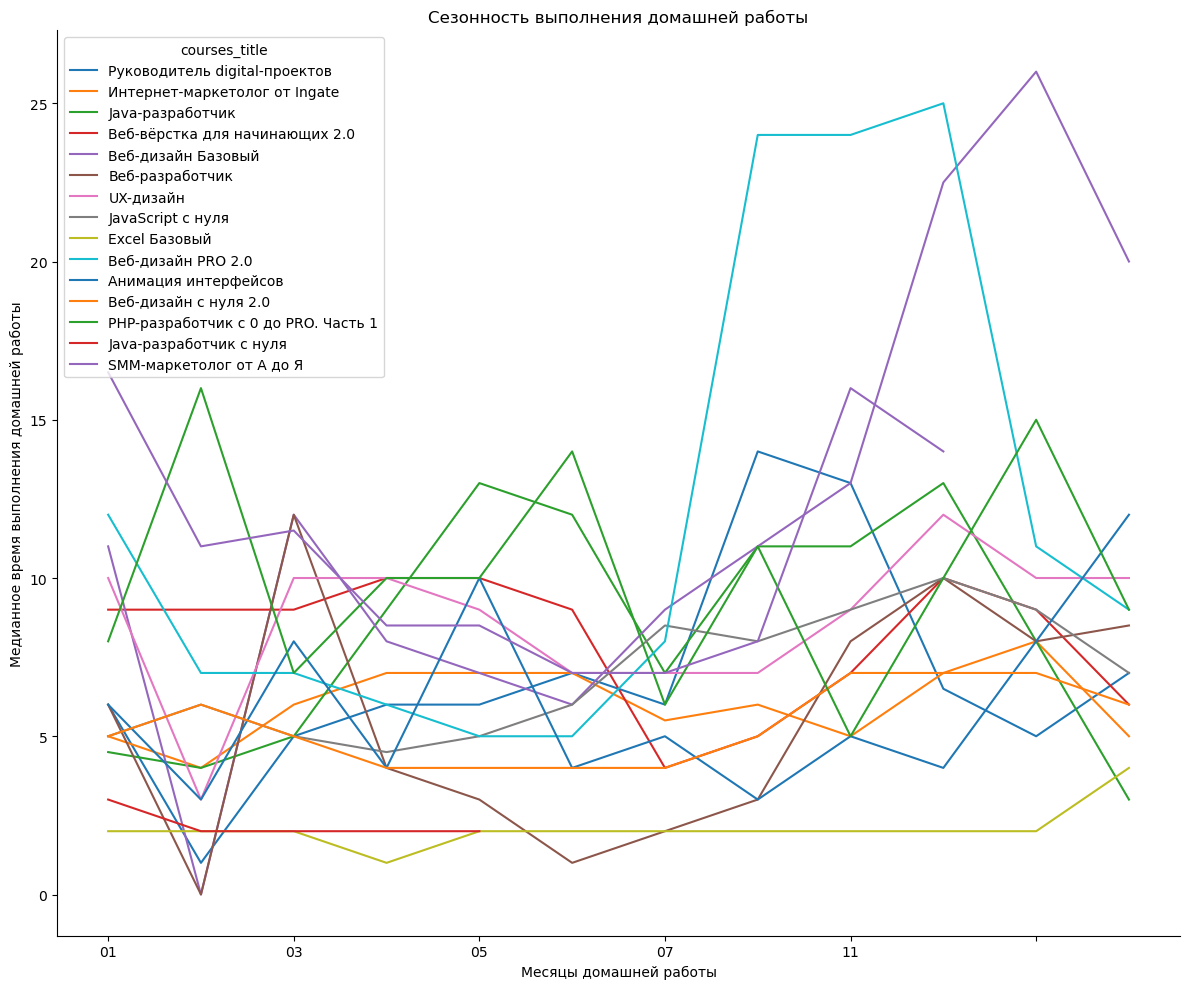

In [56]:
# Разметра сетки
fig, ax = plt.subplots(figsize=(12, 10))

# Вывод графика на страницу
for line in titles:
    data_median[data_median['courses_title']==line].pivot_table(
        'median_time', index='homework', columns='courses_title').plot(ax=ax, x_compat=True)

ax.set_title('Сезонность выполнения домашней работы')
ax.set_xlabel('Месяцы домашней работы')
ax.set_ylabel('Медианное время выполнения домашней работы')

# Скрытие рамки графика
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Автоматическое позиционирование элементов графика
fig.tight_layout()
plt.show()

Выводы
- В диаграммах медианного времени прохождения каждого модуля для каждого курса можно выделить несколько групп поведения кривых.
- Есть графики, у каторых значения идут по нарастающей "Excel Базовый", "JavaScript с нуля", "SMM-маркетолог от А до Я", "Веб-разработчик".
- Все остальные курсы можно отнести ко второй группе, где время прохождения варьируется от минимума до максимума.
- Это может быть связано с тем, что каждый отдельный блок имеет разный объём информации. Например, Веб-дизайн PRO 2.0, идет теория, после разбор кейса и снова теория следующего модуля. Обучение на курсах Skillbox выстроена таким образом, что в течении обучения проходишь несколько проектов 
- Самым продолжительным модулем по времени выполнения является курсовая работа курса "Веб-разработчик" более 100 дней.
- Диаграмма сезонности выполнения домашнего задания показывает, что период с августа по январь является пиком по выполнению домашних заданий.
- Резкое падение по выполнению домашних заданий приходится на февраль месяц и значительное снижение активности в летние месяцы года с мая по июль 

## 4. Расчет конверсии

**Посчитаем конверсию перехода студентов из одного модуля в другой на каждом курсе.**

In [57]:
data_conversion  = df.loc[df['is_homework']==True, 
    ['courses_title', 'courses_field', 'module_number', 'module_title', 'student_id', 'start_date', 'finish_date']
].groupby(
    ['courses_title', 'courses_field', 'module_number', 'module_title', 'student_id']
).aggregate(
    {'start_date': np.min, 'finish_date': np.max}
)

In [58]:
# Перегруппировка датасета по модулю c подсчетом количества студентов начавших и завершивших обучение 
data_conversion  = data_conversion .assign(
    student_start=data_conversion ['start_date'].notnull(), student_finish=data_conversion ['finish_date'].notnull()
).groupby(
    ['courses_title', 'courses_field', 'module_number', 'module_title']
).aggregate(
    {'student_start': np.sum, 'student_finish': np.sum, 'start_date': np.min, 'finish_date': np.max}
).sort_index().reset_index()

In [59]:
# Преобразование формата дат к краткому виду
data_conversion['start_date'] = data_conversion['start_date'].astype('datetime64[D]')
data_conversion['finish_date'] = data_conversion['finish_date'].astype('datetime64[D]')

# Расчет конверсии и добавление значений в датасет
for course in data_conversion['courses_title'].unique():
    for index, module_number in data_conversion.loc[data_conversion['courses_title']==course, 'module_number'].items():
        # Определение количества студентов, начавших обучение в текущем модуле
        student_start = data_conversion.loc[index, 'student_start']
        # Определение количества студентов, завершивших обучение в предыдущем модуле
        student_finish = data_conversion.loc[
            (data_conversion['courses_title']==course) & (data_conversion['module_number'] < module_number), 'student_finish'
        ].tail(1).min()
        # Подсчет конверсии текущего модуля
        data_conversion.loc[index, 'conversion'] = student_start / student_finish if student_finish > 0 else 0

data_conversion.head()

courses_title courses_field  module_number  \
0  Excel Базовый      Business              1   
1  Excel Базовый      Business              2   
2  Excel Базовый      Business              3   
3  Excel Базовый      Business              4   
4  Excel Базовый      Business              5   

                                        module_title  student_start  \
0                          Основной функционал Excel            454   
1            Основной функционал Excel (продолжение)            402   
2                  Формулы и функции Excel. Введение            383   
3  Формулы и функции Excel. Продолжаем работать с...            299   
4     Формулы и функции Excel. Более сложные формулы            266   

   student_finish start_date finish_date  conversion  
0             454 2018-02-19  2019-07-17    0.000000  
1             402 2018-02-19  2019-07-17    0.885463  
2             383 2018-02-19  2019-07-17    0.952736  
3             299 2018-02-19  2019-07-17    0.780679  
4             266 2018-02-19  2019-07-17    0.889632

**Построим bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.**

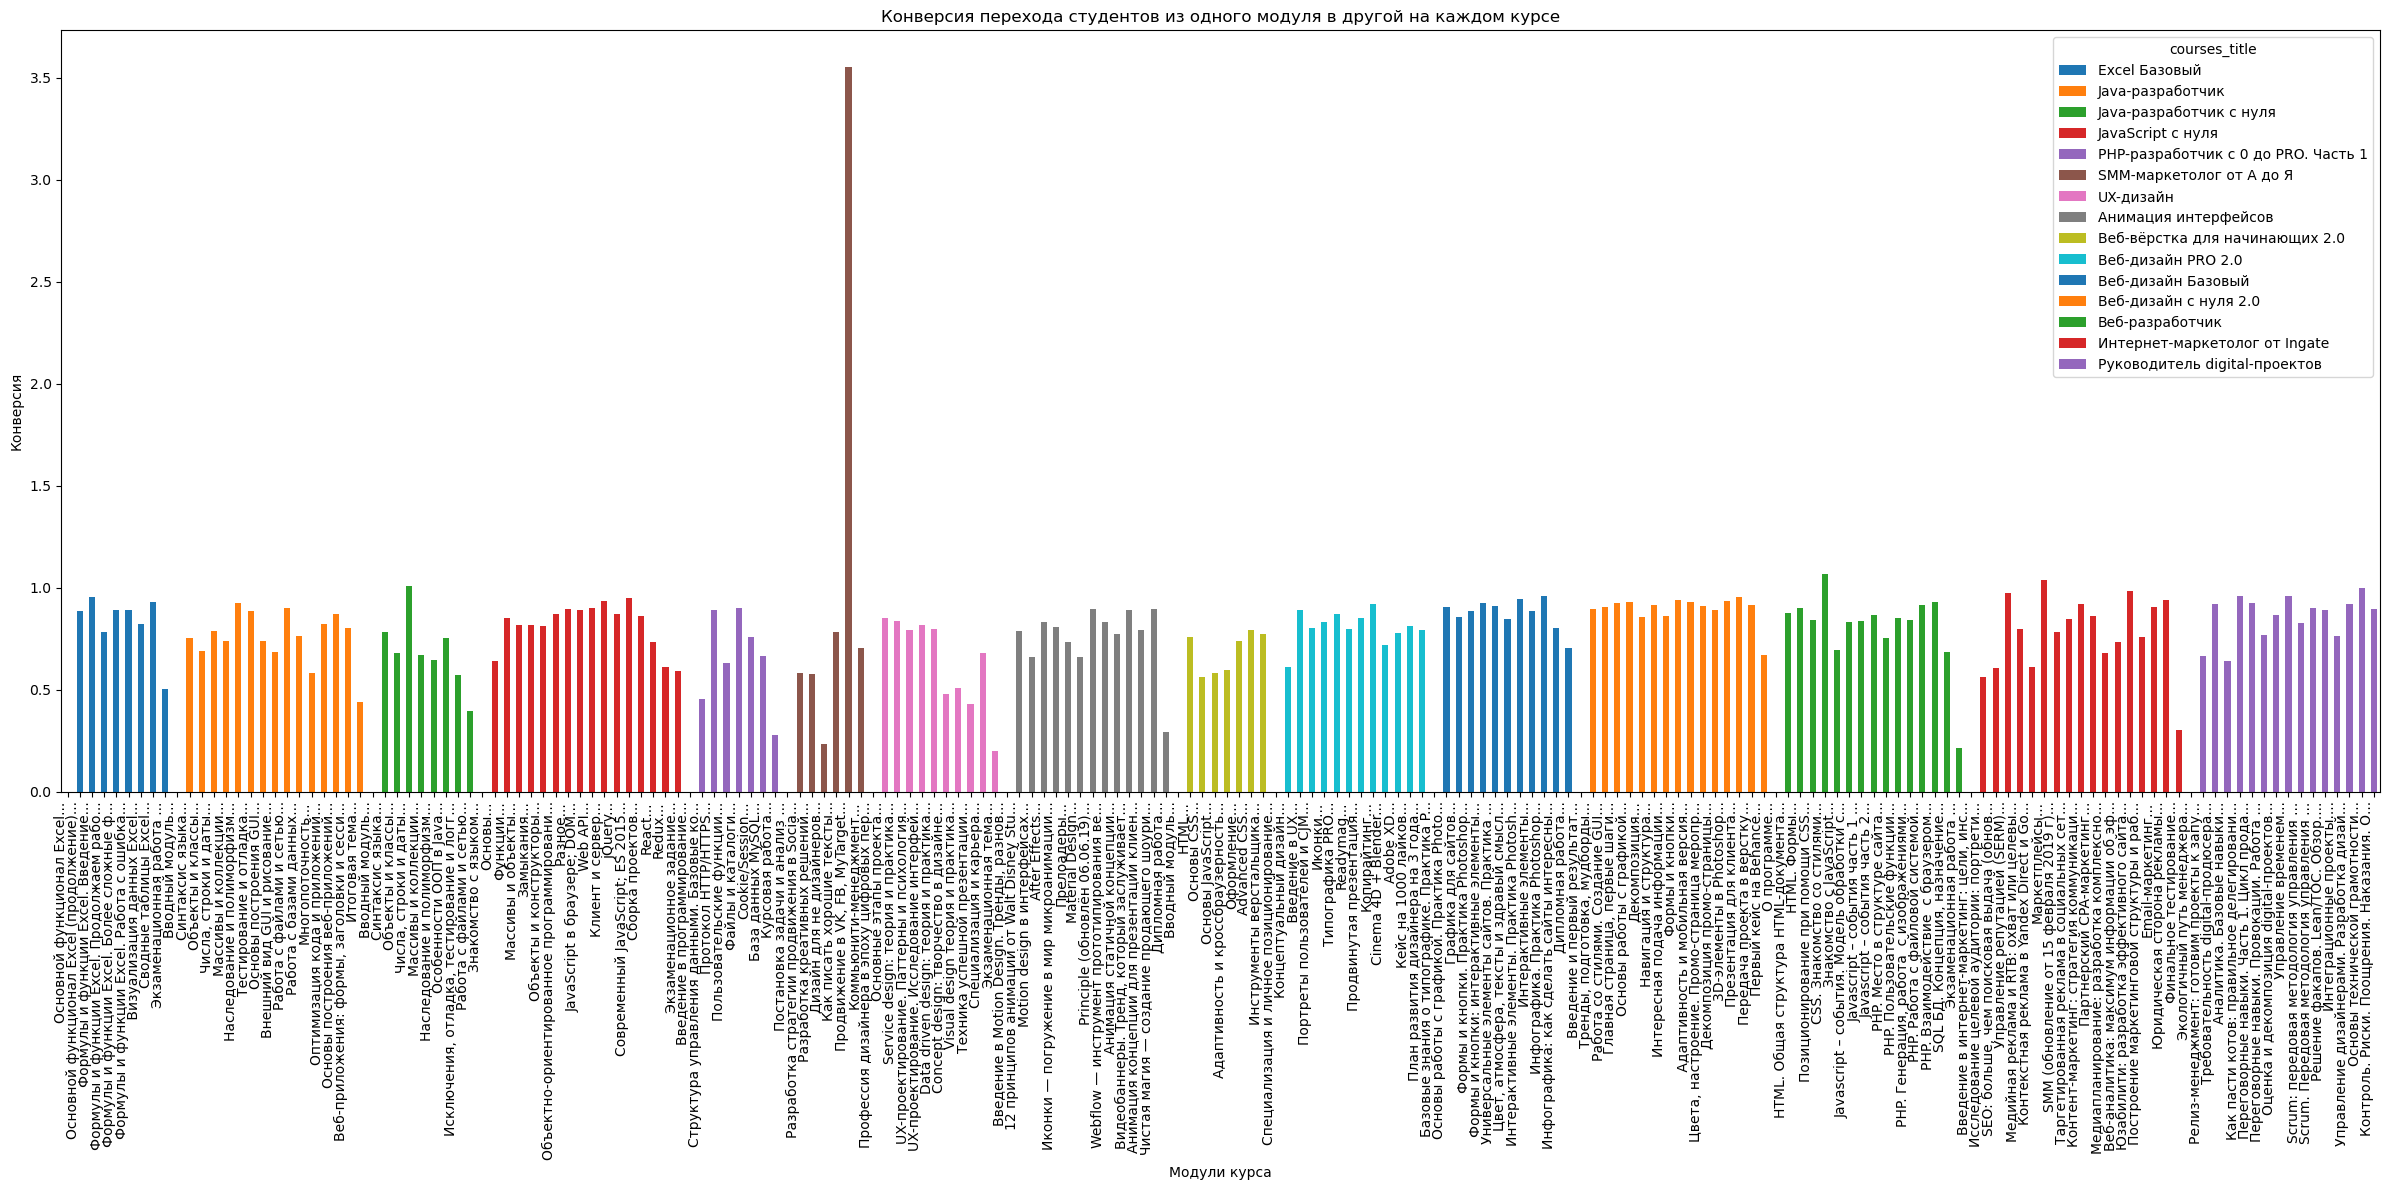

In [60]:
# Разметра сетки
fig, ax = plt.subplots(figsize=(24, 12))

# Вывод диаграммы на страницу
data_conversion.pivot_table( values='conversion', index=data_conversion.index, columns='courses_title'
).plot.bar(ax=ax, title='Конверсия перехода студентов из одного модуля в другой на каждом курсе', stacked=True)

# Вывод подписей делений оси абсцисс
ax.set_xticklabels(data_conversion['module_title'].apply(lambda x: f'{x[:40]}...'), rotation=90, ha='right')
ax.set_xlabel('Модули курса')
ax.set_ylabel('Конверсия')

fig.tight_layout()
plt.show()

**Построим горизонтальный bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.**

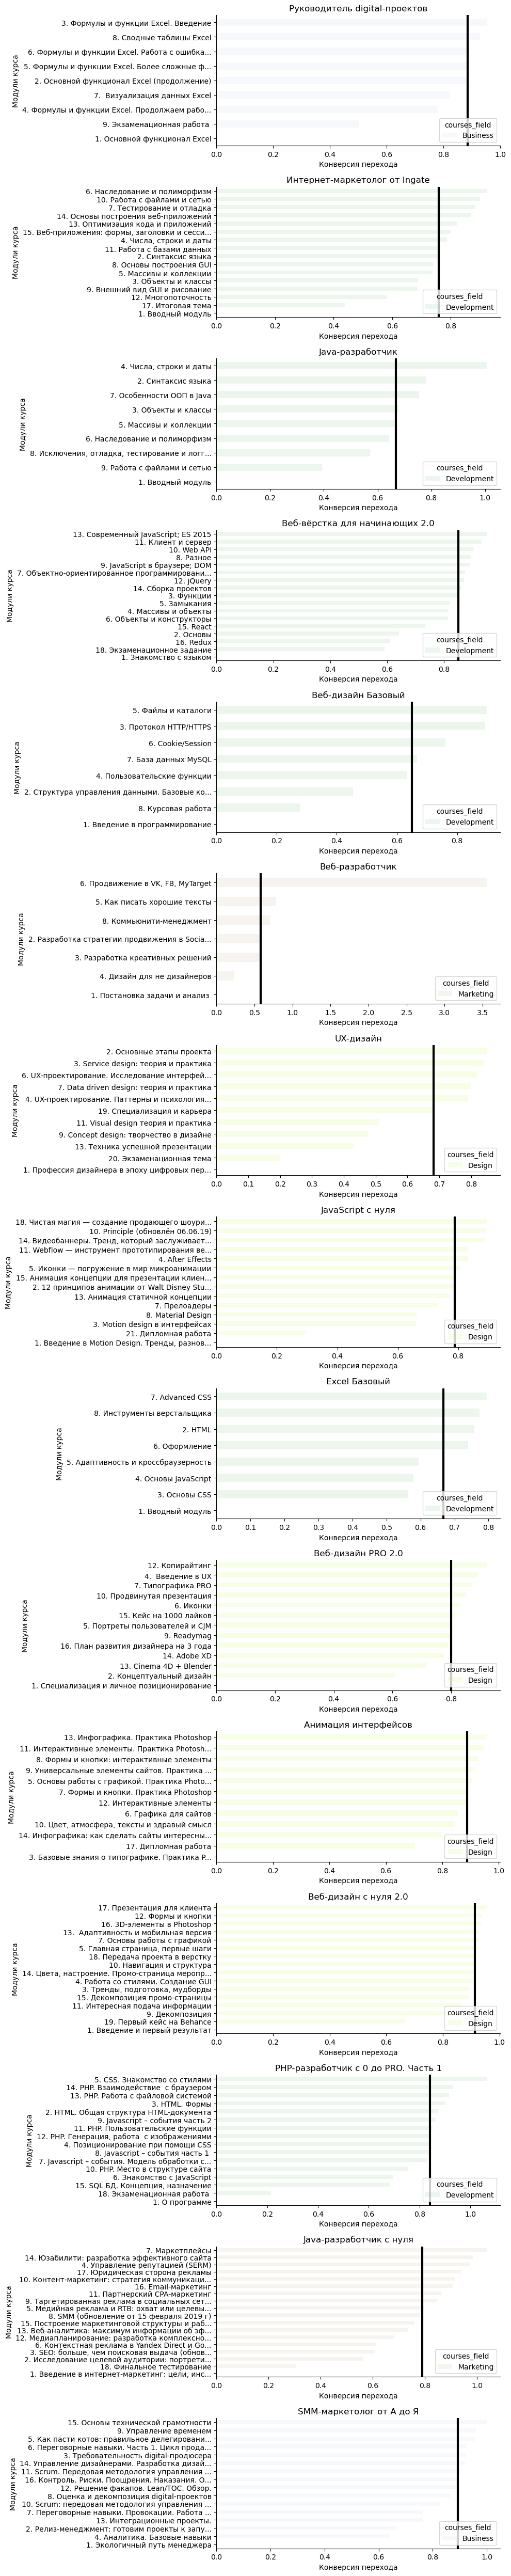

In [61]:
# Импортирование библиотеки цветов matplotlib
import matplotlib.colors as colors

fig, ax = plt.subplots(15, 1, figsize=(10, 50))

# Формирование списка курсов
courses = data_conversion['courses_title'].unique()

# Формирование словаря из сферы курса и цвета
colors = dict(zip(data_conversion['courses_field'].unique(), colors.XKCD_COLORS))

for index, ax in enumerate(ax.flat):
    # Определение датасета курса
    chart_df = data_conversion[data_conversion['courses_title']==courses[index]].sort_values('conversion').reset_index(drop=True)
    # Вывод диаграммы на страницу
    chart_df.pivot_table(
        values='conversion', index=chart_df.index, columns='courses_field'
    ).plot.barh(ax=ax, width=0.5, title=titles[index], color=colors[chart_df['courses_field'].unique()[0]], alpha=0.1)
    # Вывод линии медианы на диаграмму
    ax.vlines(chart_df['conversion'].median(), ax.get_ylim()[0], ax.get_ylim()[1], color='k', linewidth=3)
    # Вывод подписей делений оси ординат
    ax.set_yticklabels(chart_df[['module_number', 'module_title']].apply(lambda x: '{}. {}'.format(
                x['module_number'], 
                x['module_title'][:40] + '...' if len(x['module_title']) > 40 else x['module_title']), axis=1))
    ax.set_xlabel('Конверсия перехода')
    ax.set_ylabel('Модули курса')
    # Скрытие рамки диаграммы
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)

fig.tight_layout()
plt.show()

# Выводы

- Нормальная конверсия равна должна стремится к 1.0.
Расмотрим каждый график по отдельности
- Руководитель DIgital-проектовю График показывает что практически у всех модулей уровень конверсии равен медианному. Небольшое превышение имеют модули "Экзаменационная работа" и "Сводные таблицы Exel".
- Интернет-маркетолог от Ingate. На фоне относительно стабильных показателей конверсии у большинства модулей курса, заметно низкие показатели имеет "Вводный модуль", "Объекты и классы», «Синтаксис языка». Модуль "Итоговая тема", "Оптимизация кода приложения", имеет незначительное превышение медианного уровня конверсии. Конвертация к концу курса увеличивается
- Java-разработчик. На графике видно заметные колебания медианного значения конверсии. Здесь можно выделить модуль "Числа, строки и даты", "Синтаксис языка", "Объекты и классы" значение конверсии которого несколько превышает медианное значение больше 1.0. В данном курсе конверсия в первых модулях была намного выше, чем в последних двух. Т.е. интерес студентов падал к концу обучения.
- Веб-вёрстка для начинающих 2.0. Здесь можно выделить модуль "Экзаменационное задание", который имеет заметное превышение конверсии над остальными модулями. В остальном все модули стремятся к 1.
- Вэб-дизайн Базовый. Заключительный модуль "Протокол HTTP/HTTPS" имеет уровень конверсии несколько больший чем у остальных модулей данного курса.
- Веб-разработчик. Модуль "Продвижение в VK, FB" имеет большой отрыв (в 5 раз) в отличие от уровня конверсии всех остальных модулей курса. Наименьший показатель имеет модуль "Дизайн для не дизайнеров".
- UX-Дизайн. Здесь все модули имеют достаточно одинаковый уровень конверсии равный медианному значению. Заключительные модули "Специализация и карьера" и "Экзаменационная темы" имеют уровень конверсии несколько больший чем у остальных модулей данного курса
- JavaScript с нуля. В модуле "Чистая магия-создание продающего шоурила" можно наблюдать значительное повышение уровня конверсии относительно медианного значения.
- Excel Базовый. Здесь практически все модули имеют одинаковый уровень конверсии, за исключением модуля "HTML", которая составляет чуть менее медианного значения конверсии, который равен значению несколько меньшему 1.0
- Веб-дизайн PRO 2.0. Небольшое отклонение от медианы в меньшую сторону имеет модуль "Cinema 4D + Blender", а также "Портреты пользователей и CJM" и "Концептуальный дизайн".
- Анимация интерфейсов. Здесь можно выделить модуль "Дипломная работа", который имеет заметное превышение конверсии над остальными модулями. Остальные модули все стремятся к единице. Хороший курс, т.к. конверсия во всех модулях имеет примерно одинаковый показатель.
- Веб-дизайн с нуля 2.0. Здесь график не имеет значительных отклонений в показателях конверсии модулей от её медианного значения на всем курсе.
- PHP-разработчик с 0 до PRO. Часть 1. На графике конверсии так же выделяется последний модуль "Экзаменационная работа".
- Java-разработчик с нуля. Заметное превышение медианного уровня конверсии наблюдается у модулей "Маркетплейсы", "Юзабилити: разработка эффективного сайта". Ниже линии медианы расположился модуль "Финальное тестирование». Стоит пересмотреть данный модуль, потому что на других курсах финальные модули имеют высокие показатели.
- SMM-маркетолог от А до Я. Хорошие показатели по конверсии.
- В целом, рассмотрев уровни конверсии на всех курсах, можно заключить, что на каждом курсе медианное значение конверсии приблизительно равно единице. Это означает что основная масса студентов в равном количестве переходит от модуля к модулю. Так же можно заметить тенденцию к понижению конверсии у модулей, содержащих больше теоретических знаний, чем практических. В разы большую конверсию чем медианное значение имеют модули с наибольшей популярностью в использовании на практике.


## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъёмными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте её.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [51]:
df.head()

progress_id                        student_id  \
1  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
2  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
3  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
5  cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   
6  cc5799c97826d79ac3ede2791daac00e  9dfc270466449081a82b19afd5fd44f4   

                          course_id                  courses_title  \
1  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
2  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
3  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
5  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   
6  0770b1b039964228294f1f34b29fc2c1  Руководитель digital-проектов   

  courses_field  module_number                module_title  lesson_number  \
1      Business              4   Аналитика. Базовые навыки              1   
2      Business              4   Аналитика. Базовые навыки              2   
3      Business              4   Аналитика. Базовые навыки              3   
5      Business              1  Экологичный путь менеджера              2   
6      Business              1  Экологичный путь менеджера              3   

                                        lesson_title  \
1                       Аналитика в digital-проектах   
2                           Пишем ТЗ. Годные шаблоны   
3                                    Домашняя работа   
5  Требовательность: как ее развивать у себя и св...   
6                Власть. Мозгоклюйство. Эксплуатация   

                           lesson_token  is_video  is_homework status  \
1  96c8b66c-6bce-4d02-908f-7577dc2b32b3      True        False   done   
2  c75f28a2-02fe-47ce-929d-6db242111831      True        False   done   
3  e977dbbd-0b9f-461d-8599-b4abdc9e54f9     False         True   done   
5  720c3243-971b-4800-8a36-1828d13ff5a0      True        False   done   
6  b331d3fa-26bb-4bfa-9868-8c356712cfda      True        False   done   

               start_date             finish_date  
1 2018-02-19 19:21:24.985 2018-02-20 08:46:02.007  
2 2018-02-19 19:21:25.002 2018-02-20 08:46:02.022  
3 2018-02-19 19:21:25.013 2018-02-20 08:46:02.029  
5 2018-02-10 09:58:23.000 2018-02-10 12:12:24.000  
6 2018-02-10 12:12:24.000 2018-02-10 12:30:06.000

**Для того, чтоб определить метрику успеваемости взглянем на основную таблицу. Успешность курса можно оценить по количеству студентов, завершивших обучение. Исходя из таблицы этот показатель может быть определен временем между датой окончания последнего пройденного урока (домашнего задания) и датой предоставления последних данных.**

4 группы стадии обучения студента:
- 1 группа – студенты, успешно завершившие обучение.
  - Критерий оценки - 100% прогресс прохождения уроков и выполнения домашних заданий;
- 2 группа – студенты, находящиеся в рамках учебного процесса.
  - Критерий оценки - в процессе обучения студента, между последней лекцией и сдачей домашней работы прошло не больше 1 месяца;
- 3 группа – студенты, столкнувшиеся со сложностями в процессе обучения.
  - Критерий оценки - значение между последней лекцией и сдачей домашней работой прошло не больше 3 месяцев. Прогресс прохождения уроков не меньше 50 %. Чаще всего студент в институте или на онлайн курсах понимает в начале обучения, будет дальше учится или нет. Очень редко кто, бросает учебу после половины прохождения. С каждым модулем программа становится сложнее и могут возникать проблемы 
- 4 группа – студенты, не завершившие и досрочно прекратившие обучение.
  - Критерий оценки - значение между последней лекцией и сдачей домашней работой прошло больше 3 месяцев. Прогресс прохождения уроков меньше 50 %. В среднем курсы на Skillbox рассчитаны от 6-9 месяцев. Студент, зная это понимает, что есть сроки, в которые он должен укладываться. Если он прошел 40% примерно 3-4 месяца и потом не заходит на платформу в течении 3 месяцев, то вероятно уже не вернется и бросил; 


**Разделение студентов по вышеуказанным критериям позволит провести первичный анализ аудитории, а именно:
1 группа и 2 группа как успешная аудитория студентов в анализе не рассматривается, 3 группа студентов требует активного участия преподавателей с целью повышения мотивации студента и выявления истинных причин низкой исполнительской дисциплины, 4 группа требует внимания с целью последующего выявления закономерностей между текущей профессией студента, выбранным курсом и неуспешным завершением обучения.**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328290 entries, 1 to 350675
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   progress_id    328290 non-null  object        
 1   student_id     328290 non-null  object        
 2   course_id      328290 non-null  object        
 3   courses_title  328290 non-null  object        
 4   courses_field  328290 non-null  object        
 5   module_number  328290 non-null  int64         
 6   module_title   328290 non-null  object        
 7   lesson_number  328290 non-null  int64         
 8   lesson_title   328290 non-null  object        
 9   lesson_token   328290 non-null  object        
 10  is_video       328290 non-null  bool          
 11  is_homework    328290 non-null  bool          
 12  status         328290 non-null  object        
 13  start_date     328290 non-null  datetime64[ns]
 14  finish_date    328290 non-null  datetime64[ns]
dtype

In [69]:
# Формирование датасета 
data_group = df.groupby(['student_id', 'courses_title', 'module_title', 'lesson_title']
).aggregate(
    {'start_date': np.min, 'finish_date': np.max, 'is_homework': np.max}
).reset_index()
data_group.head()

student_id             courses_title  \
0  000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
1  000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
2  000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
3  000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
4  000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   

                module_title  \
0   Дизайн для не дизайнеров   
1   Дизайн для не дизайнеров   
2   Дизайн для не дизайнеров   
3  Как писать хорошие тексты   
4  Как писать хорошие тексты   

                                        lesson_title              start_date  \
0      Основы создания рекламной графики для digital 2019-07-05 18:42:14.274   
1   Основы типографики, композиции и работы с цветом 2019-07-05 18:42:32.584   
2  Практические навыки работы в Adobe Photoshop и... 2019-07-05 18:42:19.504   
3                     Как писать не уныло и рекламно 2019-07-06 01:03:33.056   
4                                  Работа с авторами 2019-07-06 01:21:33.549   

              finish_date  is_homework  
0 2019-07-05 18:42:19.486        False  
1 2019-07-05 18:42:38.925        False  
2 2019-07-05 18:42:32.563        False  
3 2019-07-06 01:12:55.738        False  
4 2019-07-06 17:14:50.618        False

In [70]:
# Формирование датасета по прохождению уроков студентами с общим количеством уроков
lessons_metrics = data_group.groupby(['student_id', 'courses_title']).aggregate(lessons_progress=('lesson_title', np.size)).reset_index()

# Формирование датасета с общим количеством уроков
lessons_total_metrics = data_group .groupby(['courses_title', 'module_title']
).aggregate( {'lesson_title': lambda x: x.unique().size}).groupby(['courses_title']
).aggregate(lessons_total=('lesson_title', np.sum)).reset_index()


In [71]:
# Соединение таблиц 
lessons_metrics = lessons_metrics.merge(lessons_total_metrics)
lessons_metrics

student_id             courses_title  \
0      000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
1      00c7cd8ec0064fec2a4e963ac5441c34  SMM-маркетолог от А до Я   
2      016d1186aaf4378ca1c92f78ae82de55  SMM-маркетолог от А до Я   
3      01868d79f6359e02cb39b1a00a5cd63d  SMM-маркетолог от А до Я   
4      01f54f5f119e0395e632d9022aa5e786  SMM-маркетолог от А до Я   
...                                 ...                       ...   
12728  fdbdb86871e94862bf9518f83bf1789c      Анимация интерфейсов   
12729  fe3863e44e3167eaeb32d63cd6ec3574      Анимация интерфейсов   
12730  fe452d896dc3a55c0c2dee67efd362a5      Анимация интерфейсов   
12731  fe4f8cf191bf11e1fd699a571053983d      Анимация интерфейсов   
12732  ff38b14e11ab4189f28109f0f12ecbf8      Анимация интерфейсов   

       lessons_progress  lessons_total  
0                    33             62  
1                    15             62  
2                     4             62  
3                    11             62  
4                    34             62  
...                 ...            ...  
12728                 2             62  
12729                17             62  
12730                 2             62  
12731                 1             62  
12732                 7             62  

[12733 rows x 4 columns]

In [72]:
# Определение прогресса обучения каждого студента
lessons_metrics['progress'] = (lessons_metrics['lessons_progress'] / lessons_metrics['lessons_total'] * 100).round(1)
lessons_metrics

student_id             courses_title  \
0      000333b6aa5706c53f4d2ec24c7a128d  SMM-маркетолог от А до Я   
1      00c7cd8ec0064fec2a4e963ac5441c34  SMM-маркетолог от А до Я   
2      016d1186aaf4378ca1c92f78ae82de55  SMM-маркетолог от А до Я   
3      01868d79f6359e02cb39b1a00a5cd63d  SMM-маркетолог от А до Я   
4      01f54f5f119e0395e632d9022aa5e786  SMM-маркетолог от А до Я   
...                                 ...                       ...   
12728  fdbdb86871e94862bf9518f83bf1789c      Анимация интерфейсов   
12729  fe3863e44e3167eaeb32d63cd6ec3574      Анимация интерфейсов   
12730  fe452d896dc3a55c0c2dee67efd362a5      Анимация интерфейсов   
12731  fe4f8cf191bf11e1fd699a571053983d      Анимация интерфейсов   
12732  ff38b14e11ab4189f28109f0f12ecbf8      Анимация интерфейсов   

       lessons_progress  lessons_total  progress  
0                    33             62      53.2  
1                    15             62      24.2  
2                     4             62       6.5  
3                    11             62      17.7  
4                    34             62      54.8  
...                 ...            ...       ...  
12728                 2             62       3.2  
12729                17             62      27.4  
12730                 2             62       3.2  
12731                 1             62       1.6  
12732                 7             62      11.3  

[12733 rows x 5 columns]

In [78]:
# Формирование датасета для посчета количества дней которые прошли с последнего действия 
students_metrics = data_group.groupby(['student_id', 'courses_title']).aggregate({'start_date': np.min, 'finish_date': np.max}).reset_index()

# Добавление количества дней прошедших с даты последнего урока или домашнего задания
students_metrics['days_last_act'] = (students_metrics['finish_date'].max() - students_metrics['finish_date']).dt.days
students_metrics.head()

student_id                  courses_title  \
0  000333b6aa5706c53f4d2ec24c7a128d       SMM-маркетолог от А до Я   
1  0007e271c3f2f20ff8675df9d81e0401          Веб-дизайн с нуля 2.0   
2  000ca3ad0aaedff60d95d309b038210b  Интернет-маркетолог от Ingate   
3  0010ab47e706e3ae6ac718d5cf06b752  Интернет-маркетолог от Ingate   
4  00114204df65ed8458822835b928393c  Интернет-маркетолог от Ingate   

               start_date             finish_date  days_last_act  
0 2019-05-31 13:07:52.938 2019-07-10 22:21:19.260              6  
1 2019-02-22 08:00:49.094 2019-06-20 07:45:06.847             27  
2 2019-05-18 14:16:33.060 2019-07-02 07:22:27.144             15  
3 2019-04-01 21:36:32.953 2019-05-18 21:15:07.317             59  
4 2018-09-28 11:44:47.213 2019-03-28 10:33:37.918            110

In [81]:
# Добавление показателей по успеваемости обучения студентов
students_metrics = students_metrics.merge(lessons_metrics, how='left').fillna(0)
students_metrics

student_id                   courses_title  \
0      000333b6aa5706c53f4d2ec24c7a128d        SMM-маркетолог от А до Я   
1      0007e271c3f2f20ff8675df9d81e0401           Веб-дизайн с нуля 2.0   
2      000ca3ad0aaedff60d95d309b038210b   Интернет-маркетолог от Ingate   
3      0010ab47e706e3ae6ac718d5cf06b752   Интернет-маркетолог от Ingate   
4      00114204df65ed8458822835b928393c   Интернет-маркетолог от Ingate   
...                                 ...                             ...   
12728  ffd7a91bcf8acfe1afd2e74c7374cf23  Веб-вёрстка для начинающих 2.0   
12729  ffe5329154259d3f3f5eee58a06ef6f5         Java-разработчик c нуля   
12730  ffef4e9e2855886ae9aaac19cd5020e6   Интернет-маркетолог от Ingate   
12731  fff9c6b403f88a6b83dc1837a93dc4dd                Java-разработчик   
12732  fffc0307abdaa5ba8bf0b6e88b101712   Интернет-маркетолог от Ingate   

      start_date finish_date  days_last_act  lessons_progress  lessons_total  \
0     2019-05-31  2019-07-10              6                33             62   
1     2019-02-22  2019-06-20             27                44             82   
2     2019-05-18  2019-07-02             15                54            171   
3     2019-04-01  2019-05-18             59                55            171   
4     2018-09-28  2019-03-28            110                 8            171   
...          ...         ...            ...               ...            ...   
12728 2019-01-24  2019-02-08            158                25             55   
12729 2019-06-27  2019-07-03             13                 6            105   
12730 2018-10-25  2018-11-09            249                 5            171   
12731 2018-06-18  2019-02-25            141                86            114   
12732 2019-07-14  2019-07-14              2                 1            171   

       progress  
0          53.2  
1          53.7  
2          31.6  
3          32.2  
4           4.7  
...         ...  
12728      45.5  
12729       5.7  
12730       2.9  
12731      75.4  
12732       0.6  

[12733 rows x 8 columns]

In [82]:
# Преобразование даты к типу datetime
students_metrics['start_date'] = students_metrics['start_date'].astype('datetime64[D]')
students_metrics['finish_date'] = students_metrics['finish_date'].astype('datetime64[D]')
students_metrics

student_id                   courses_title  \
0      000333b6aa5706c53f4d2ec24c7a128d        SMM-маркетолог от А до Я   
1      0007e271c3f2f20ff8675df9d81e0401           Веб-дизайн с нуля 2.0   
2      000ca3ad0aaedff60d95d309b038210b   Интернет-маркетолог от Ingate   
3      0010ab47e706e3ae6ac718d5cf06b752   Интернет-маркетолог от Ingate   
4      00114204df65ed8458822835b928393c   Интернет-маркетолог от Ingate   
...                                 ...                             ...   
12728  ffd7a91bcf8acfe1afd2e74c7374cf23  Веб-вёрстка для начинающих 2.0   
12729  ffe5329154259d3f3f5eee58a06ef6f5         Java-разработчик c нуля   
12730  ffef4e9e2855886ae9aaac19cd5020e6   Интернет-маркетолог от Ingate   
12731  fff9c6b403f88a6b83dc1837a93dc4dd                Java-разработчик   
12732  fffc0307abdaa5ba8bf0b6e88b101712   Интернет-маркетолог от Ingate   

      start_date finish_date  days_last_act  lessons_progress  lessons_total  \
0     2019-05-31  2019-07-10              6                33             62   
1     2019-02-22  2019-06-20             27                44             82   
2     2019-05-18  2019-07-02             15                54            171   
3     2019-04-01  2019-05-18             59                55            171   
4     2018-09-28  2019-03-28            110                 8            171   
...          ...         ...            ...               ...            ...   
12728 2019-01-24  2019-02-08            158                25             55   
12729 2019-06-27  2019-07-03             13                 6            105   
12730 2018-10-25  2018-11-09            249                 5            171   
12731 2018-06-18  2019-02-25            141                86            114   
12732 2019-07-14  2019-07-14              2                 1            171   

       progress  
0          53.2  
1          53.7  
2          31.6  
3          32.2  
4           4.7  
...         ...  
12728      45.5  
12729       5.7  
12730       2.9  
12731      75.4  
12732       0.6  

[12733 rows x 8 columns]

In [83]:
# 1 группа – студенты, успешно завершившие обучение.
study_end=students_metrics.query('progress == 100').groupby('courses_title')['student_id'].count()
study_end

courses_title
Excel Базовый                      59
Java-разработчик                    7
Java-разработчик c нуля             3
JavaScript с нуля                  12
SMM-маркетолог от А до Я            2
UX-дизайн                           1
Веб-вёрстка для начинающих 2.0     69
Веб-дизайн PRO 2.0                 22
Веб-дизайн Базовый                 52
Веб-дизайн с нуля 2.0             237
Веб-разработчик                     3
Интернет-маркетолог от Ingate      13
Руководитель digital-проектов      35
Name: student_id, dtype: int64

In [84]:
# Общее количество студентов, успешно завершивших обучение
students_metrics.query('progress == 100')['student_id'].count()

515

In [86]:
# 2 группа – студенты, находящиеся в рамках учебного процесса.
study_process=students_metrics.query('progress < 100 & days_last_act < 31').groupby('courses_title')['student_id'].count()
study_process

courses_title
Excel Базовый                          154
Java-разработчик                       103
Java-разработчик c нуля                326
JavaScript с нуля                      163
PHP-разработчик с 0 до PRO. Часть 1    117
SMM-маркетолог от А до Я               237
UX-дизайн                              199
Анимация интерфейсов                    56
Веб-вёрстка для начинающих 2.0         349
Веб-дизайн PRO 2.0                     301
Веб-дизайн Базовый                      29
Веб-дизайн с нуля 2.0                  638
Веб-разработчик                         27
Интернет-маркетолог от Ingate          672
Руководитель digital-проектов          132
Name: student_id, dtype: int64

In [91]:
# Общее количество студентов, находящихся в рамках учебного процесса
students_metrics.query('progress < 100 & days_last_act < 30')['student_id'].count()

3442

In [100]:
# 3 группа – студенты, столкнувшиеся со сложностями в процессе обучения.
study_problem= students_metrics.query('progress > 50 & 31 < days_last_act < 180').groupby('courses_title')['student_id'].count()
study_problem

courses_title
Excel Базовый                          182
Java-разработчик                        80
Java-разработчик c нуля                  7
JavaScript с нуля                       42
PHP-разработчик с 0 до PRO. Часть 1     33
SMM-маркетолог от А до Я                30
UX-дизайн                              119
Анимация интерфейсов                    24
Веб-вёрстка для начинающих 2.0         166
Веб-дизайн PRO 2.0                      69
Веб-дизайн Базовый                     103
Веб-дизайн с нуля 2.0                  457
Веб-разработчик                         39
Интернет-маркетолог от Ingate          104
Руководитель digital-проектов           64
Name: student_id, dtype: int64

In [95]:
students_metrics.query('progress > 50 & 31 < days_last_act < 180')['student_id'].count()

1519

In [40]:
# 4 группа – студенты, не завершившие и досрочно прекратившие обучение.
study_drop = students_metrics.query('progress < 50 & days_last_act > 180').groupby('courses_title')['student_id'].count()
study_drop 

courses_title
Excel Базовый                           78
Java-разработчик                       197
JavaScript с нуля                      135
PHP-разработчик с 0 до PRO. Часть 1    131
SMM-маркетолог от А до Я                23
UX-дизайн                              317
Анимация интерфейсов                   158
Веб-вёрстка для начинающих 2.0         288
Веб-дизайн PRO 2.0                     237
Веб-дизайн Базовый                     155
Веб-дизайн с нуля 2.0                  221
Веб-разработчик                        184
Интернет-маркетолог от Ingate          493
Руководитель digital-проектов          200
Name: student_id, dtype: int64

In [93]:
students_metrics.query('progress < 50 & days_last_act > 180')['student_id'].count()

2817

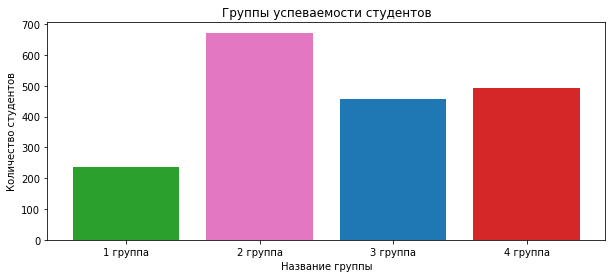

In [112]:
#Диаграмма успеваемости студентов
# Импортирование библиотеки цветов matplotlib
import matplotlib.colors as colors

# Определение основных объектов диаграммы
fig, ax = plt.subplots(figsize=(10, 4))

# Отражение численности групп на диаграмме
ax.bar('1 группа',study_end , color='tab:green')
ax.bar('2 группа',study_process, color='tab:pink')
ax.bar('3 группа', study_problem, color='tab:blue')
ax.bar('4 группа',study_drop, color='tab:red')

# Вывод подписей делений оси абсцисс
ax.set_title('Группы успеваемости студентов')

# Вывод названия осей
ax.set(xlabel='Название группы', ylabel='Количество студентов')

# Вывод диаграммы на страницу
plt.show();

**По данным исследования, проведённого в России в 2020 году, только у 28 % онлайн-школ до конца курса доходят 70 % учеников и более. В мире в целом “доходимость” два-три года назад ещё ниже: в среднем курс заканчивали только 3 % из тех, кто его начал, причём показатель с годами падал всё сильнее.**

https://drive.google.com/file/d/1LWKKJVpUTYZCFF9xOs_hzGW7KNmEnWR1/view

https://www.insidehighered.com/digital-learning/article/2019/01/16/study-offers-data-show-moocs-didnt-achieve-their-goals

Вывод:
- 4 группа - те, кто бросают обучение приблизительно - 33% от общего количества учеников 
- 3 группа студентов, кто находится в затруднении -  18 %
- В общей сумме это 50 %. С этой группой людей и нужно работать

**Рассмотрим, как среди курсов распределяются данные по этим двум группам риска**

In [154]:
# dataframe для всех студентов по курсам
alls= students_metrics.groupby('courses_title')['student_id'].count()
df_all= pd.DataFrame(alls).reset_index()
df_all 

courses_title  student_id
0                         Excel Базовый         675
1                      Java-разработчик         701
2               Java-разработчик c нуля         530
3                     JavaScript с нуля         659
4   PHP-разработчик с 0 до PRO. Часть 1         518
5              SMM-маркетолог от А до Я         477
6                             UX-дизайн         920
7                  Анимация интерфейсов         404
8        Веб-вёрстка для начинающих 2.0        1394
9                    Веб-дизайн PRO 2.0        1056
10                   Веб-дизайн Базовый         476
11                Веб-дизайн с нуля 2.0        1897
12                      Веб-разработчик         363
13        Интернет-маркетолог от Ingate        2042
14        Руководитель digital-проектов         621

In [155]:
# dataframe для студентов с возникшими проблемами по курсам
data_problem = pd.DataFrame(study_problem).reset_index()
data_problem

courses_title  student_id
0                         Excel Базовый         182
1                      Java-разработчик          80
2               Java-разработчик c нуля           7
3                     JavaScript с нуля          42
4   PHP-разработчик с 0 до PRO. Часть 1          33
5              SMM-маркетолог от А до Я          30
6                             UX-дизайн         119
7                  Анимация интерфейсов          24
8        Веб-вёрстка для начинающих 2.0         166
9                    Веб-дизайн PRO 2.0          69
10                   Веб-дизайн Базовый         103
11                Веб-дизайн с нуля 2.0         457
12                      Веб-разработчик          39
13        Интернет-маркетолог от Ingate         104
14        Руководитель digital-проектов          64

In [156]:
data_drop = pd.DataFrame(study_drop).reset_index()
data_drop

courses_title  student_id
0                         Excel Базовый          78
1                      Java-разработчик         197
2                     JavaScript с нуля         135
3   PHP-разработчик с 0 до PRO. Часть 1         131
4              SMM-маркетолог от А до Я          23
5                             UX-дизайн         317
6                  Анимация интерфейсов         158
7        Веб-вёрстка для начинающих 2.0         288
8                    Веб-дизайн PRO 2.0         237
9                    Веб-дизайн Базовый         155
10                Веб-дизайн с нуля 2.0         221
11                      Веб-разработчик         184
12        Интернет-маркетолог от Ingate         493
13        Руководитель digital-проектов         200

In [157]:
df_all= df_all.merge(data_drop, on='courses_title', how='left').fillna(0)
df_all

courses_title  student_id_x  student_id_y
0                         Excel Базовый           675          78.0
1                      Java-разработчик           701         197.0
2               Java-разработчик c нуля           530           0.0
3                     JavaScript с нуля           659         135.0
4   PHP-разработчик с 0 до PRO. Часть 1           518         131.0
5              SMM-маркетолог от А до Я           477          23.0
6                             UX-дизайн           920         317.0
7                  Анимация интерфейсов           404         158.0
8        Веб-вёрстка для начинающих 2.0          1394         288.0
9                    Веб-дизайн PRO 2.0          1056         237.0
10                   Веб-дизайн Базовый           476         155.0
11                Веб-дизайн с нуля 2.0          1897         221.0
12                      Веб-разработчик           363         184.0
13        Интернет-маркетолог от Ingate          2042         493.0
14        Руководитель digital-проектов           621         200.0

In [158]:
# Определение конверсии для группы 4 , бросает обучение 
df_all['conver_3'] = (data_problem['student_id']/df_all['student_id_x'] * 100).round(1)
df_all['conver_4']= (df_all['student_id_y']/df_all['student_id_x'] * 100).round(1)
df_all

courses_title  student_id_x  student_id_y  conver_3  \
0                         Excel Базовый           675          78.0      27.0   
1                      Java-разработчик           701         197.0      11.4   
2               Java-разработчик c нуля           530           0.0       1.3   
3                     JavaScript с нуля           659         135.0       6.4   
4   PHP-разработчик с 0 до PRO. Часть 1           518         131.0       6.4   
5              SMM-маркетолог от А до Я           477          23.0       6.3   
6                             UX-дизайн           920         317.0      12.9   
7                  Анимация интерфейсов           404         158.0       5.9   
8        Веб-вёрстка для начинающих 2.0          1394         288.0      11.9   
9                    Веб-дизайн PRO 2.0          1056         237.0       6.5   
10                   Веб-дизайн Базовый           476         155.0      21.6   
11                Веб-дизайн с нуля 2.0          1897         221.0      24.1   
12                      Веб-разработчик           363         184.0      10.7   
13        Интернет-маркетолог от Ingate          2042         493.0       5.1   
14        Руководитель digital-проектов           621         200.0      10.3   

    conver_4  
0       11.6  
1       28.1  
2        0.0  
3       20.5  
4       25.3  
5        4.8  
6       34.5  
7       39.1  
8       20.7  
9       22.4  
10      32.6  
11      11.6  
12      50.7  
13      24.1  
14      32.2

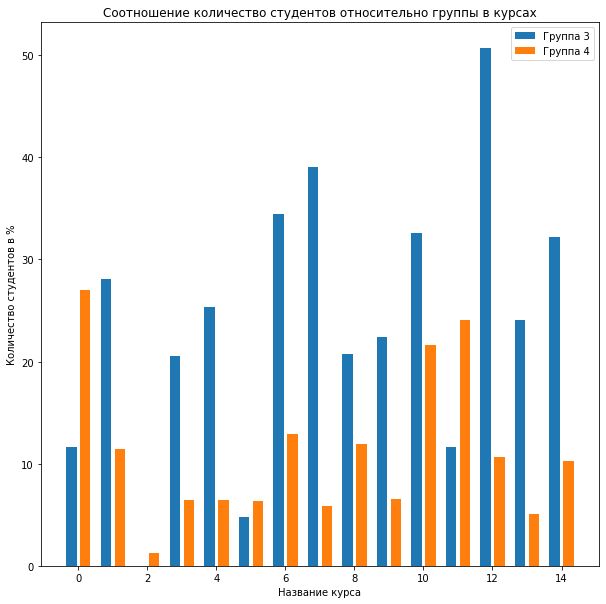

In [159]:
# Построение графика
width = 0.3
x = np.arange(len(df_all['courses_title']))
fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - 0.2, df_all['conver_4'], width, label='Группа 3')
rects2 = ax.bar(x + 0.2, df_all['conver_3'], width, label='Группа 4')
ax.set_title('Соотношение количество студентов относительно группы в курсах')
# Вывод названия осей
ax.set(xlabel='Название курса', ylabel='Количество студентов в %')
ax.legend();

**На основании имеющихся данных представлена метрика и визуализированна успеваемость студента.**